# Environment setup

In [1]:
#Import packages
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import rtree
import fiona
import shapely
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as cx
import ee
import geemap
import geemap.foliumap as geemapf
import geetools
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling
import affine
import wget
import zipfile
import datetime
import pyinaturalist
from scipy import ndimage
import urllib
import requests
import json
import geojson
import rasterstats
import glob 
from geo_northarrow import add_north_arrow
import rioxarray
import xarray as xr
import pyogrio
import geocube
from geocube.vector import vectorize
import mapclassify
from pysal.model import spreg
import mgwr
import cmasher as cmr
import pyinaturalist

In [236]:
pd.options.mode.chained_assignment = None

<IPython.core.display.HTML object>

In [2]:
#Authenticate to Earth Engine
ee.Authenticate()

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

Enter verification code:  4/1AcvDMrBFC5Jsn_MeKvHTtvfXs4KsXHPkzLAuwvmfh6UvZ_Rhv8VQyTcCjUE



Successfully saved authorization token.


In [3]:
#Initialize earth engine project
ee.Initialize(project='ee-cefisher20')

<IPython.core.display.HTML object>

In [4]:
cd "C:\Users\Chad\Desktop\CRWA Project\CRWA-Regional-Tree-Planting-and-Protection-Plan\CRWA-Regional-Tree-Planting-and-Protection-Plan"

<IPython.core.display.HTML object>

C:\Users\Chad\Desktop\CRWA Project\CRWA-Regional-Tree-Planting-and-Protection-Plan\CRWA-Regional-Tree-Planting-and-Protection-Plan


# Downloading data

In [ ]:
#MASSGIS SSURGO data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/Soils_MassGIS_SHP.zip"
zipfile.ZipFile("C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Soils_MassGIS_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Soils_MassGIS_SHP/")

In [ ]:
#MASSGIS Municipalities Data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/census2020/CENSUS2020TOWNS_SHP.zip"
zipfile.ZipFile("C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CENSUS2020TOWNS_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CENSUS2020TOWNS_SHP/")

In [ ]:
#EJ Populations
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/census2020/ej2020.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\ej2020.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/EJ Data/")

In [ ]:
#Hydrology from MassGIS
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/hydro25k.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\hydro25k.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Hydro/")

In [ ]:
#https://mapc.sharefile.com/share/view/s981467b33e8948e2bcd167d1399c6069
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\MAPC_LST.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Heat/")

In [ ]:
#Protected and Recreational Open Space
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/openspace.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\openspace.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/OpenSpace/")

In [ ]:
# TNC conservation priority data from Dira Johanif at CRWA
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\MA_CharlesRiver)NBS_11.07.gdb.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\High Level Conservation Opp-20240524T191644Z-001.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Conservation Opp (Unprotected and Undeveloped Areas)-20240524T191643Z-001.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
cons_opp=glob.glob(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\High Level Conservation Opp\*")
high_cons_opp=glob.glob(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\Conservation Opp (Unprotected and Undeveloped Areas)\*")
for fp in cons_opp:
    zipfile.ZipFile(fp).extractall(path=r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\High Level Conservation Opp")
for fp in high_cons_opp:
    zipfile.ZipFile(fp).extractall(path=r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\Conservation Opp (Unprotected and Undeveloped Areas)")

In [ ]:
# Requested statewide parcel data from MASSGIS https://www.mass.gov/info-details/massgis-data-property-tax-parcels
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Statewide_parcels_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/ParcelData/")

In [297]:
#State boundaries cartographic file
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\cb_2018_us_state_500k.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/States/")

<IPython.core.display.HTML object>


Saved under C:/Users/Chad/Desktop/CRWA Project/Raw_Data/cb_2018_us_state_500k.zip


In [ ]:
#State boundaries cartographic file for just Massachusetts
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/outlin.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\outlin.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/MASS/")

In [71]:
#Dams data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/dams.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\dams.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Dams/")

<IPython.core.display.HTML object>


Saved under C:/Users/Chad/Desktop/CRWA Project/Raw_Data/dams.zip


In [503]:
#NLCD for impervious surface
#https://www.mrlc.gov/viewer/
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\NLCD_gFaEArJ6Oh9dOXkwqx9r.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/NLCD/")

<IPython.core.display.HTML object>

# Color tools

In [90]:
#Extracting hex codes from matplotlib color maps
cmr.take_cmap_colors('BrBG', 17, return_fmt='hex')

<IPython.core.display.HTML object>


[
    '#543005',
    '#774508',
    '#995D13',
    '#B97B29',
    '#CFA256',
    '#E2C787',
    '#F1DFB3',
    '#F6EDD7',
    '#F4F5F5',
    '#D9EEEB',
    '#B6E3DD',
    '#8AD1C6',
    '#5BB3A8',
    '#2F9189',
    '#0E726A',
    '#01564D',
    '#003C30'
]

In [119]:
# Resample user-defined colormaps
colors = my_greens.resampled(6)
for i in range(0,6):
    print(mpl.colors.to_hex(colors(i)))

<IPython.core.display.HTML object>

#f7fcf5
#c0d2b3
#89a870
#578b48
#2c7c3a
#006d2c


# Importing watershed boundaries and other relevant general data

In [121]:
#Charles River Watershed boundary, Charles river, and major tributaries importing
CRW=gpd.read_file("../../Raw_Data/CRW_Boundary/CRW_Boundary/CRW_Boundary.shp",driver='pyrogio')
print('The Watershed is ',(CRW.dissolve().geometry[0].area*2.47105381/10000),' acres')
Tribs=gpd.read_file('../../Raw_Data/Rivers/Tributaries.shp',driver='pyogrio')
CHARLES=Tribs[Tribs.SARISNAME=='CHARLES RIVER']

<IPython.core.display.HTML object>

The Watershed is  198939.97068302167  acres


In [8]:
# Additional pieces of the river because some parts were missing 
rivers=gpd.read_file('../../Raw_Data/Hydro/HYDRO25K_POLY.shp',driver='pyogrio').clip(CRW)
Charles=rivers[rivers['NAME']=='Charles River'].to_crs(epsg=26986)
rivers_arc=gpd.read_file('../../Raw_Data/Hydro/HYDRO25K_ARC.shp',driver='pyogrio').clip(CRW)

<IPython.core.display.HTML object>

In [122]:
# Importing Massachusetts state boundary and cartographic files for state outlines
mass=gpd.read_file("../../Raw_Data/MASS/outlinp1.shp",driver='pyogrio')
states=gpd.read_file('../../Raw_Data/States/cb_2018_us_state_500k.shp',driver='pyogrio').to_crs(epsg=26986)

<IPython.core.display.HTML object>

In [10]:
# Read in towns SHP and clip/dissolve polygons

# Town outlines clipped to only watershed
towns=gpd.read_file("../../Raw_Data/CENSUS2020TOWNS_SHP/CENSUS2020TOWNS_POLY.shp").to_crs(CRW.crs).clip(CRW)

# Full town outlines only for towns with some part in the watershed
towns_fullout=gpd.read_file("../../Raw_Data/CENSUS2020TOWNS_SHP/CENSUS2020TOWNS_POLY.shp").to_crs(CRW.crs).sjoin(CRW).dissolve('NAMELSAD20')
towns_fullout['name']=towns_fullout.index.str.split(' ').str[0]

# Dissolving towns (the data source has them in a few pieces because of islands, etc.)
Charles_Towns=towns.to_crs(epsg=26986).dissolve('NAMELSAD20')
Charles_Towns['name']=Charles_Towns.index.str.split(' ').str[0]

<IPython.core.display.HTML object>

In [11]:
# Upper, middle, and lower subregions 
Upper=['Milford', 'Hopkinton','Walpole','Mendon', 'Bellingham', 'Franklin', 'Wrentham', 'Medway', 'Holliston', 'Norfolk', 'Foxborough','Hopedale', 'Millis', 'Medfield','Ashland']
Middle=['Sherborn', 'Dover', 'Natick', 'Needham', 'Wellesley', 'Westwood', 'Dedham','Weston', 'Waltham','Lexington','Lincoln','Wayland']
Lower=['Newton', 'Brookline', 'Boston', 'Cambridge', 'Somerville', 'Watertown','Arlington','Belmont']
CRW_Upper=Charles_Towns[np.isin(Charles_Towns['name'],Upper)]
CRW_Middle=Charles_Towns[np.isin(Charles_Towns['name'],Middle)]
CRW_Lower=Charles_Towns[np.isin(Charles_Towns['name'],Lower)]

<IPython.core.display.HTML object>

In [12]:
# Converting extent for each of the subregions and full CRW to correct format for rasterio for ensuring correct plotting later
Upper_extent=[CRW_Upper.dissolve().geometry.bounds['minx'][0],CRW_Upper.dissolve().geometry.bounds['maxx'][0],CRW_Upper.dissolve().geometry.bounds['miny'][0],CRW_Upper.dissolve().geometry.bounds['maxy'][0]]
Middle_extent=[CRW_Middle.dissolve().geometry.bounds['minx'][0],CRW_Middle.dissolve().geometry.bounds['maxx'][0],CRW_Middle.dissolve().geometry.bounds['miny'][0],CRW_Middle.dissolve().geometry.bounds['maxy'][0]]
Lower_extent=[CRW_Lower.dissolve().geometry.bounds['minx'][0],CRW_Lower.dissolve().geometry.bounds['maxx'][0],CRW_Lower.dissolve().geometry.bounds['miny'][0],CRW_Lower.dissolve().geometry.bounds['maxy'][0]]
full_extent=[CRW.dissolve().geometry.bounds['minx'][0],CRW.dissolve().geometry.bounds['maxx'][0],CRW.dissolve().geometry.bounds['miny'][0],CRW.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [13]:
# MassGIS codes for towns in Massachusetts (used for labelling) and was retrieved from https://www.mass.gov/doc/list-of-town-ids-and-names-pdf/download
town_dict={
    10:'Arlington',14:'Ashland',25:'Bellingham',26:'Belmont',35:'Boston',46:'Brookline',49:'Cambridge',73:'Dedham',78:'Dover',99:'Foxborough', 
    101:'Franklin',136:'Holliston',138:'Hopedale',139:'Hopkinton',155:'Lexington',157:'Lincoln',175:'Medfield',177:'Medway',179:'Mendon',
    185:'Milford',187:'Millis',198:'Natick',199:'Needham',207:'Newton',208:'Norfolk',269:'Sherborn',274:'Somerville',307:'Walpole',308:'Waltham', 
    314:'Watertown',315:'Wayland',317:'Wellesley',333:'Weston',335:'Westwood',350:'Wrentham'
}

<IPython.core.display.HTML object>

In [14]:
# Add town IDs to data for labelling in overview map
town_convert=pd.DataFrame({'codes':town_dict.keys(),'name':town_dict.values()})
towns_fullout=towns_fullout.merge(town_convert, on='name')

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

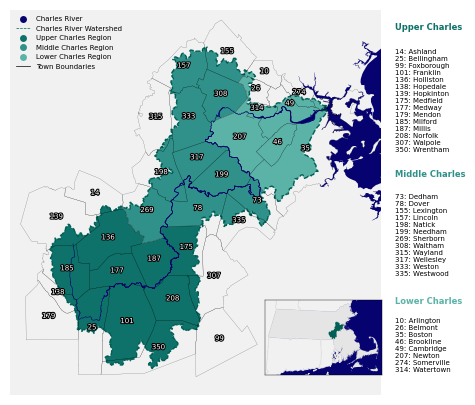

In [21]:
# Create overview map of watershed
fig,ax=plt.subplots(1,2,figsize=(6,5),width_ratios=[6,1])
fig.subplots_adjust(hspace=0, wspace=0)

# Create inset map
in_ax = fig.add_axes([0.57,0.15,0.2,0.15])
states[states.NAME!='Massachusetts'].plot(ax=in_ax,color='#f1f1f1',edgecolor='#e5e5e5',linewidth=0.5)
mass.plot(ax=in_ax,color='#e5e5e5')
CRW.plot(ax=in_ax,color='#015F56')
xMin, yMin, xMax, yMax = mass.total_bounds
box = gpd.GeoDataFrame(geometry=[shapely.box(xMin-10000, yMin-10000, xMax+10000, yMax+10000)], crs=mass.crs)
box.plot(ax=in_ax, color="#060270", zorder=0)
in_ax.set_ylim([yMin-10000,yMax+10000])
in_ax.set_xlim([xMin-10000,xMax+10000])
in_ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
[x.set_linewidth(0.3) for x in in_ax.spines.values()]

# Main map
CRW.boundary.plot(ax=ax[0],color='#015F56',linewidth=1,linestyle='--')
towns_fullout.boundary.plot(ax=ax[0],color='black',linewidth=0.1)
states[states.NAME=='Rhode Island'].plot(ax=ax[0],color='#f1f1f1',edgecolor='#f1f1f1',linewidth=2)
mass.plot(ax=ax[0],color='#f1f1f1')
CRW_Upper.dissolve().plot(ax=ax[0],color='#0E726A')
CRW_Middle.dissolve().plot(ax=ax[0],color='#2F9189')
CRW_Lower.dissolve().plot(ax=ax[0],color='#5BB3A8')
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
box = gpd.GeoDataFrame(geometry=[shapely.box(190000, 860000, 260000, 920000)], crs=mass.crs)
box.plot(ax=ax[0], color="#060270", zorder=0)
ax[0].set_ylim([860000,917000])
ax[0].set_xlim([190000,245000])
ax[0].axis('off')

# Labelling towns by IDs
towns_fullout['coords'] = towns_fullout['geometry'].apply(lambda x: x.centroid.coords[:])
towns_fullout['coords'] = [coords[0] for coords in towns_fullout['coords']]
for idx, row in towns_fullout.iterrows():
    ax[0].annotate(text=row['codes'], xy=row['coords'],
                horizontalalignment='center',fontsize=5,color='white',
                path_effects=[mpl.patheffects.withStroke(linewidth=1.5, foreground="black")])

# Creating custom legend 
l1 = mpl.lines.Line2D([], [], color='#015F56',linewidth=0.5,linestyle='--',label='Charles River Watershed')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#060270', marker='o',markeredgecolor=(1,1,1,0),markersize=5, label='Charles River')
l3 = mpl.lines.Line2D([], [], color='black',label='Town Boundaries',linewidth=0.5)
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0E726A', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Upper Charles Region')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#2F9189', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Middle Charles Region')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5BB3A8', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Lower Charles Region')
ax[0].legend(handles=[l2,l1,l4,l5,l6,l3],loc='upper left',fontsize=5,frameon=False)

# Add key on right sidebar for finding names from town codes
ax[1].annotate(text='Upper Charles\n',xy=(0,0.92),fontsize=6,weight='bold',color='#0E726A')
ax[1].annotate(text='14: Ashland\n'+'25: Bellingham\n'+'99: Foxborough\n'+'101: Franklin\n'+'136: Holliston\n'
               +'138: Hopedale\n'+'139: Hopkinton\n'+'175: Medfield\n'+'177: Medway\n'+'179: Mendon\n'+'185: Milford\n'+'187: Millis\n'
               +'208: Norfolk\n'+'307: Walpole\n'+'350: Wrentham',xy=(0,0.63),fontsize=5)
ax[1].annotate(text='Middle Charles\n',xy=(0,0.54),fontsize=6,weight='bold',color='#2F9189')
ax[1].annotate(text='73: Dedham\n'+'78: Dover\n'+'155: Lexington\n'+'157: Lincoln\n'+'198: Natick\n'+'199: Needham\n'+'269: Sherborn\n'
               +'308: Waltham\n'+'315: Wayland\n'+'317: Wellesley\n'+'333: Weston\n'+'335: Westwood',xy=(0,0.31),fontsize=5)
ax[1].annotate(text='Lower Charles\n',xy=(0,0.21),fontsize=6,weight='bold',color='#5BB3A8')
ax[1].annotate(text='10: Arlington\n'+'26: Belmont\n'+'35: Boston\n'+'46: Brookline\n'+'49: Cambridge\n'+'207: Newton\n'+'274: Somerville\n'
               +'314: Watertown',xy=(0,0.06),fontsize=5)
ax[1].axis('off')

# Save figure
fig.savefig('Output Maps/CRWA Overview Map',dpi=300,bbox_inches='tight')

# Tree Canopy

In [103]:
# Download TCC data for each year for the Charles River Watershed from GEE
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    img=ee.Image('USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4/TCC_v2021-4_CONUS_'+year).clip(geemap.geopandas_to_ee(CRW)).select('Science_Percent_Tree_Canopy_Cover').reproject(crs='EPSG:26986',scale=30)
    geemap.ee_export_image(img,filename='../../Working_Data/TCC'+year+'.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

<IPython.core.display.HTML object>

Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2008.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2009.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2010.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2011.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2012.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2013.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2014.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\TCC2015.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project

In [234]:
# Canopy statistics by towns
canStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC"+'2008'+".tif",stats="count min mean max median"),index=Charles_Towns.index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC"+year+".tif",stats="count min mean max median"),index=Charles_Towns.index)
    canStats=canStats.merge(stats,left_index=True,right_index=True,suffixes=('',year))
canStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageCanopy.csv')

# Canopy statistics for Watershed
canCRWStats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canCRWStats=canCRWStats.join(stats,rsuffix=year)
canCRWStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageCRWCanopy.csv')

# Canopy statistics for Upper subregion
canUStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canUStats=canUStats.join(stats,rsuffix=year)
canUStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageUCanopy.csv')

# Canopy statistics for Middle subregion
canMStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Middle.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW_Middle.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canMStats=canMStats.join(stats,rsuffix=year)
canMStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageMCanopy.csv')

# Canopy statistics for Lower subregion 
canLStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Lower.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW_Lower.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canLStats=canLStats.join(stats,rsuffix=year)
canLStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageLCanopy.csv')

<IPython.core.display.HTML object>

In [237]:
# Reading in data from previous cell, metling, and cleaning it into format for seaborn plots
CanData=pd.read_csv('../../Working_Data/AverageCRWCanopy.csv')
CanData=pd.melt(CanData,var_name='Year')
for i in CanData.index:
    CanData.loc[i,'Year']=CanData['Year'].iloc[i][-4:]

CanUData=pd.read_csv('../../Working_Data/AverageUCanopy.csv')
CanUData=pd.melt(CanUData,var_name='Year')
for i in CanUData.index:
    CanUData.loc[i,'Year']=CanUData['Year'].iloc[i][-4:]

CanMData=pd.read_csv('../../Working_Data/AverageMCanopy.csv')
CanMData=pd.melt(CanMData,var_name='Year')
for i in CanMData.index:
    CanMData.loc[i,'Year']=CanMData['Year'].iloc[i][-4:]

CanLData=pd.read_csv('../../Working_Data/AverageLCanopy.csv')
CanLData=pd.melt(CanLData,var_name='Year')
for i in CanLData.index:
    CanLData.loc[i,'Year']=CanLData['Year'].iloc[i][-4:]

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

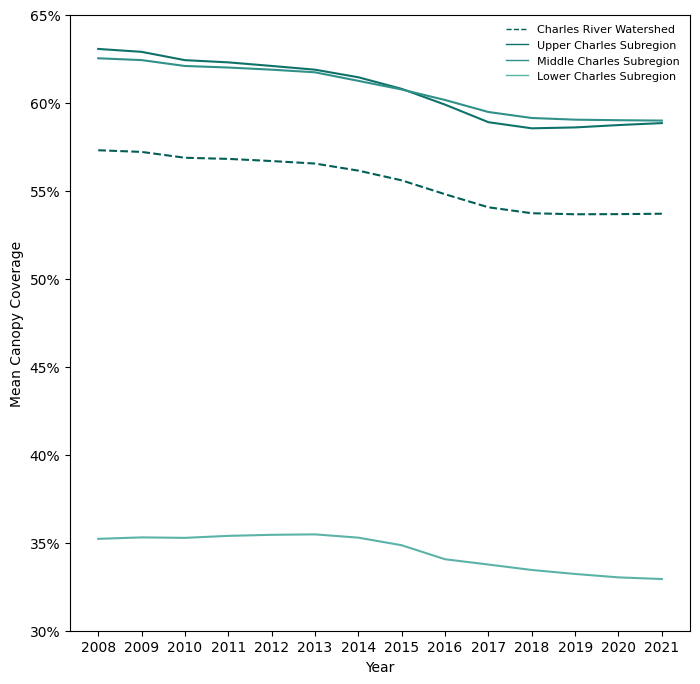

In [27]:
# Plot average canopy coverage for each region over time
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(CanData[1:],x='Year',y='value',ax=ax,color='#015F56',linestyle='--')
sns.lineplot(CanUData[1:],x='Year',y='value',ax=ax,color='#0E726A')
sns.lineplot(CanMData[1:],x='Year',y='value',ax=ax,color='#2F9189')
sns.lineplot(CanLData[1:],x='Year',y='value',ax=ax,color='#5BB3A8')
ax.set_ylabel('Mean Canopy Coverage')
ax.set_ylim([30,65])
l1 = mpl.lines.Line2D([], [], color='#015F56',linewidth=1,linestyle='--',label='Charles River Watershed')
l4 = mpl.lines.Line2D([], [], color='#0E726A', linewidth=1, label='Upper Charles Subregion')
l5 = mpl.lines.Line2D([], [], color='#2F9189', linewidth=1, label='Middle Charles Subregion')
l6 = mpl.lines.Line2D([], [], color='#5BB3A8', linewidth=1, label='Lower Charles Subregion')
ax.legend(handles=[l1,l4,l5,l6],loc='upper right',fontsize=8,frameon=False)
ax.set_xlabel('Year')
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))
fig.savefig('Output Maps/Canopy CRW time series',dpi=300,transparent=True,bbox_inches='tight')

In [238]:
# Read canopy data by town and reformat/clean
CanData=pd.read_csv('../../Working_Data/AverageCanopy.csv')
CanData['name']=CanData.NAMELSAD20.str.split(' ').str[0]
CanData=CanData[['name','mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']]
CanData=pd.melt(CanData,id_vars='name',var_name='Year')
for i in CanData.index:
    CanData.loc[i,'Year']=CanData['Year'].iloc[i][-4:]

<IPython.core.display.HTML object>

In [81]:
# Extracting town data for each subregion and converting to acreage
CanData_U=CanData[np.isin(CanData['name'],Upper)]
CanData_U=CanData_U.pivot(columns='Year',index='name')
for column in CanData_U.columns:
    lista=(CanData_U[column]/100)
    listb=CRW_Upper.geometry.area*2.47105381/10000
    CanData_U[column]=[a*b for a,b in zip(lista,listb)]
    
CanData_M=CanData[np.isin(CanData['name'],Middle)]
CanData_M=CanData_M.pivot(columns='Year',index='name')
for column in CanData_M.columns:
    lista=(CanData_M[column]/100)
    listb=CRW_Middle.geometry.area*2.47105381/10000
    CanData_M[column]=[a*b for a,b in zip(lista,listb)]
    
CanData_L=CanData[np.isin(CanData['name'],Lower)]
CanData_L.loc[0,'Year']='mean2008'
CanData_L=CanData_L.pivot(columns='Year',index='name')
for column in CanData_L.columns:
    lista=(CanData_L[column]/100)
    listb=CRW_Lower.geometry.area*2.47105381/10000
    CanData_L[column]=[a*b for a,b in zip(lista,listb)]

<IPython.core.display.HTML object>

In [102]:
# Simplified version of above data with just total acreage for each subregion instead of dissagregated by town
simData=pd.DataFrame([CanData_U.sum(axis=0),CanData_M.sum(axis=0),CanData_L.sum(axis=0)])

<IPython.core.display.HTML object>

In [104]:
#Defining color codes for subregions for plotting
regcolors=['#0E726A','#2F9189','#5BB3A8']
my_regs = mpl.colors.LinearSegmentedColormap.from_list('my_regs',regcolors,N=256)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

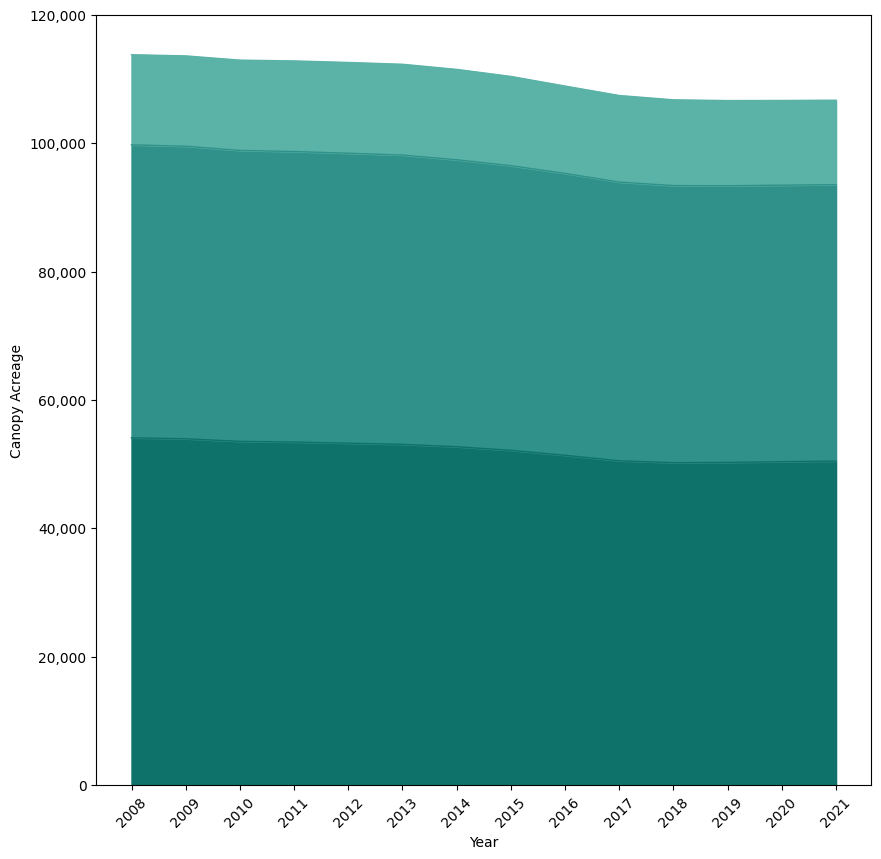

In [107]:
# Acreage of each subregion over time 
fig,ax=plt.subplots(figsize=(10,10))
simData.T.plot.area(ax=ax,stacked=True,legend=False,cmap=my_regs,linewidth=1)

ax.set_ylabel('Canopy Acreage')
ax.set_xlabel('Year')
ax.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
ax.set_ylim([0,120000])
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.savefig('Output Maps/Canopy time series acreage simple.png',dpi=300,transparent=True,bbox_inches='tight')

<IPython.core.display.HTML object>

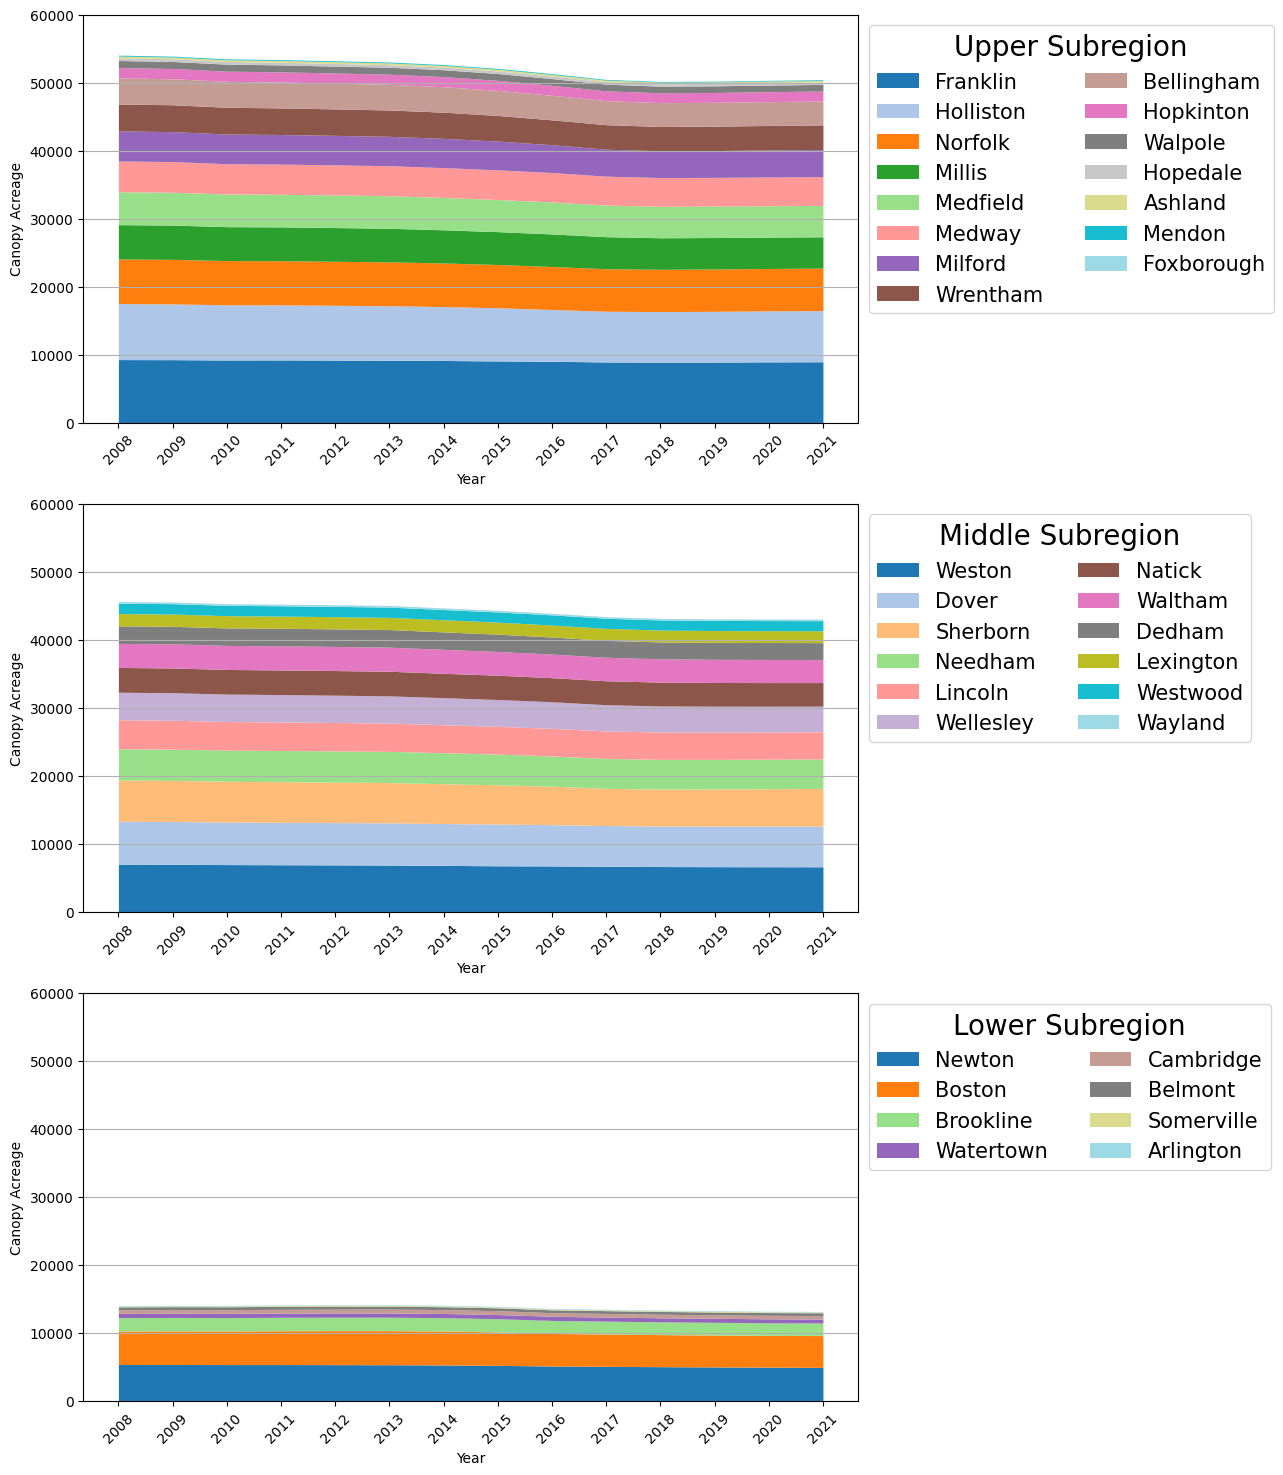

In [117]:
# Acreage over time for each town broken down by subregion
fig,ax=plt.subplots(3,1,figsize=(10,18))

CanData_U.sort_values(('value', 'mean2008'),ascending=False).T.plot.area(ax=ax[0],stacked=True,legend=True,cmap='tab20',linewidth=0)
CanData_M.sort_values(('value', 'mean2008'),ascending=False).T.plot.area(ax=ax[1],stacked=True,legend=True,cmap='tab20',linewidth=0)
CanData_L.sort_values(('value', 'mean2008'),ascending=False).T.plot.area(ax=ax[2],stacked=True,legend=True,cmap='tab20',linewidth=0)

# Fixing labels, tick marks, and legend
ax[0].set_ylabel('Canopy Acreage')
ax[0].set_xlabel('Year')
ax[0].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
h,l = ax[0].get_legend_handles_labels()
ax[0].legend_.remove()
ax[0].legend(h,l, ncol=2,loc='upper left',bbox_to_anchor=(1,1),fontsize=15,title='Upper Subregion',title_fontsize=20)
ax[0].set_ylim([0,60000])
ax[0].grid(visible=True,which='major',axis='y')

# Fixing labels, tick marks, and legend
ax[1].set_ylabel('Canopy Acreage')
ax[1].set_xlabel('Year')
ax[1].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
h,l = ax[1].get_legend_handles_labels()
ax[1].legend_.remove()
ax[1].legend(h,l, ncol=2,loc='upper left',bbox_to_anchor=(1,1),fontsize=15,title='Middle Subregion',title_fontsize=20)
ax[1].set_ylim([0,60000])
ax[1].grid(visible=True,which='major',axis='y')

# Fixing labels, tick marks, and legend
ax[2].set_ylabel('Canopy Acreage')
ax[2].set_xlabel('Year')
ax[2].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
h,l = ax[2].get_legend_handles_labels()
ax[2].legend_.remove()
ax[2].legend(h,l, ncol=2,loc='upper left',bbox_to_anchor=(1,1),fontsize=15,title='Lower Subregion',title_fontsize=20)
ax[2].set_ylim([0,60000])
ax[2].grid(visible=True,which='major',axis='y')

fig.savefig('Output Maps/Canopy time series.png',dpi=300,transparent=True,bbox_inches='tight')

In [25]:
# Extracting difference in tree canopy from GEE
TCC2021=ee.Image('USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4/TCC_v2021-4_CONUS_2021').clip(geemap.geopandas_to_ee(CRW)).select('Science_Percent_Tree_Canopy_Cover').reproject(crs='EPSG:26986',scale=30)
TCC2008=ee.Image('USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4/TCC_v2021-4_CONUS_2008').clip(geemap.geopandas_to_ee(CRW)).select('Science_Percent_Tree_Canopy_Cover').reproject(crs='EPSG:26986',scale=30)
dtreeCover=TCC2021.subtract(TCC2008)
dtreeCover=geemap.ee_export_image(dtreeCover, filename='../../Working_Data/dTCC08_21.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

<IPython.core.display.HTML object>

Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\dTCC08_21.tif


In [52]:
# Read in tree canopy change data and get plotting extent for mapping
TCC2021,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2008,trans=mask(rio.open('../../Working_Data/TCC2008.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
dTCC,trans=mask(rio.open('../../Working_Data/dTCC08_21.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
plot_extent = rio.plot.plotting_extent(rio.open('../../Working_Data/TCC2021.tif'))

<IPython.core.display.HTML object>

In [57]:
# Create my own version of a Greens colormap
colors7=['#f7fcf5','#6d934f','#006d2c'] 
my_greens = mpl.colors.LinearSegmentedColormap.from_list('my_cmap7',colors7,N=256)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

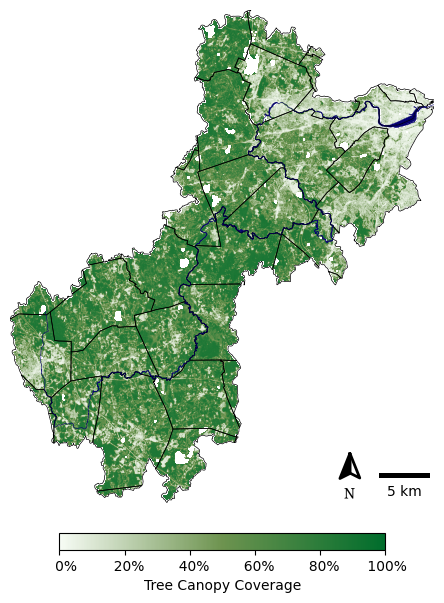

In [58]:
# Plot 2021 tree canopy coverage
f, ax = plt.subplots(figsize=(6,8))
hidden = ax.imshow(TCC2021[0,:,:],cmap=my_greens,extent=plot_extent,alpha=1,vmin=0,vmax=100)
show(TCC2021,cmap=my_greens,ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
ax.axis('off')
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Tree Canopy Coverage')
f.savefig('Output Maps/2021 TCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [53]:
# Calculate zonal statistics, join back onto town data frame and extract town name for 2021 tree canopy coverage
canStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Charles_Towns.index)
canStats=canStats.merge(Charles_Towns.to_crs(epsg=26986),left_index=True,right_index=True)
canStats['name']=canStats.index.str.split(' ').str[0]

<IPython.core.display.HTML object>

In [54]:
# Sort by mean tree canopy percent change
canStats=canStats.sort_values(by='mean')

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

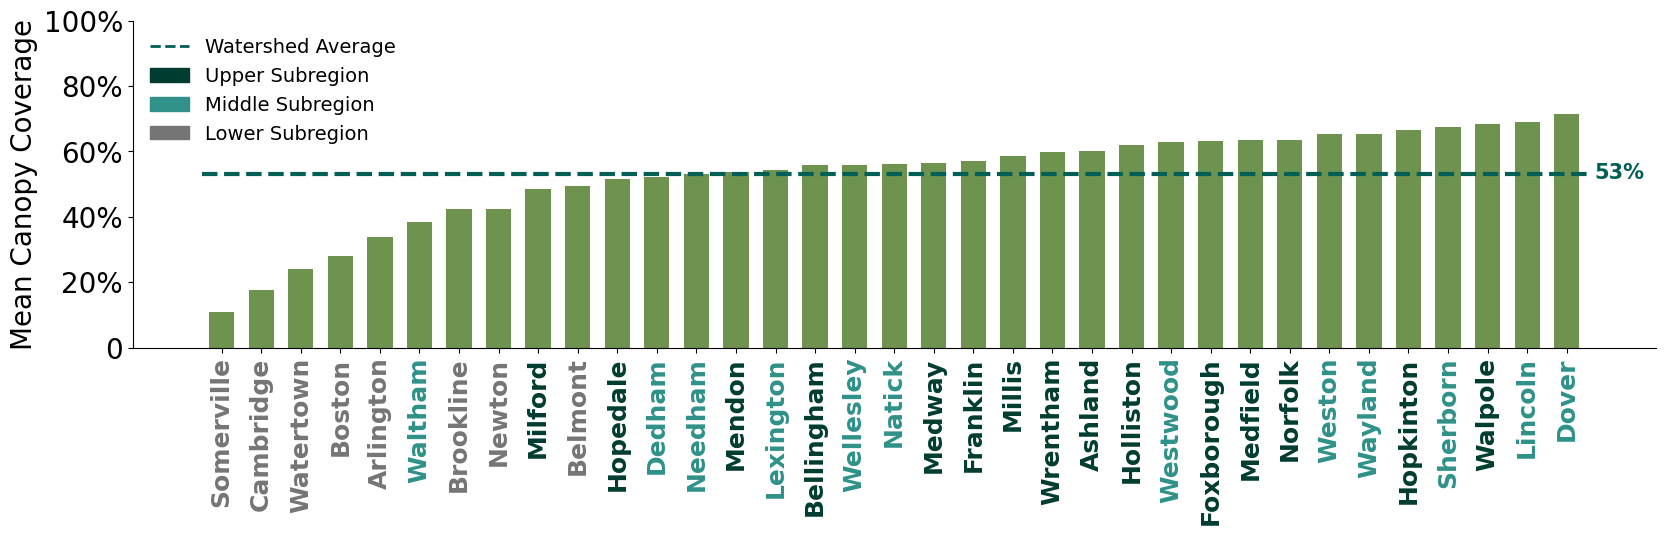

In [60]:
# Add barplot, set properties, and change colors
cols = ['#003c30' if np.isin(x,Upper) else ('#2F9189' if np.isin(x,Middle) else '#757575') for x in canStats.name]
ax=sns.catplot(canStats,y='mean',x='name',orient='v',color='#6d934f',
            kind='bar',height=4, aspect=4,saturation=1,width=0.8,gap=0.2,legend=False)
plt.hlines(y=53,xmin=-.5,xmax=34.5,color='#015F56', linewidth=3,linestyle='--')
ax.set(xlabel=None)
plt.ylabel(ylabel='Mean Canopy Coverage',fontsize=20)
plt.xticks(rotation=90,fontsize=18,weight='bold')
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), cols):
    ticklabel.set_color(tickcolor)
plt.yticks(fontsize=20)
plt.ylim([0,100])
l1 = mpl.lines.Line2D([], [], color='#015F56', linewidth=2,linestyle='--',label='Watershed Average')
l4 = mpl.patches.Patch(color='#003c30',label='Upper Subregion')
l5 = mpl.patches.Patch(color='#2F9189',label='Middle Subregion')
l6 = mpl.patches.Patch(color='#757575',label='Lower Subregion')
plt.gca().text(34.7,51.5,'53%',fontsize=15,color='#015F56',weight='bold')
plt.legend(handles=[l1,l4,l5,l6],loc='upper left',fontsize=14,frameon=False)
ax.set_yticklabels(['0','20%','40%','60%','80%','100%'], rotation=0)
plt.savefig('Output Maps/2021 Canopy graph for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [65]:
# Calculate zonal statistics, join back onto town data frame and extract town name for change in tree canopy coverage
townStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/dTCC08_21.tif",stats="count min mean max median"),index=Charles_Towns.index)
townStats=townStats.merge(Charles_Towns.to_crs(epsg=26986),left_index=True,right_index=True)
townStats['name']=townStats.index.str.split(' ').str[0]

<IPython.core.display.HTML object>

In [66]:
# Sort by mean tree canopy percent change
townStats=townStats.sort_values(by='mean')

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

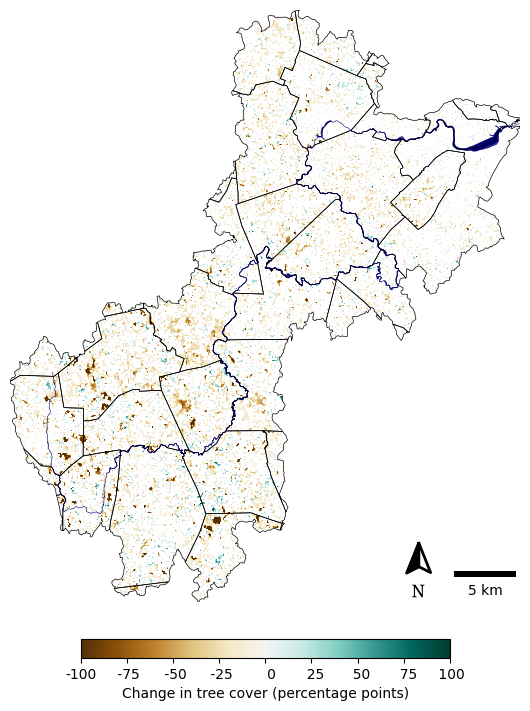

In [72]:
# Create subplots
f, ax = plt.subplots(figsize=(6,8),layout='tight')

hidden = ax.imshow(dTCC[0,:,:],cmap='BrBG',extent=plot_extent,alpha=1,vmin=-100,vmax=100)

show(dTCC,cmap='BrBG',ax=ax,extent=plot_extent,alpha=1,vmin=-50,vmax=50)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

f.colorbar(hidden, cmap='BrBG',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Change in tree cover (percentage points)',format="%4i")

ax.add_artist(ScaleBar(1,location='lower right'))
ax.set_axis_off()
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
f.savefig('Output Maps/dTCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

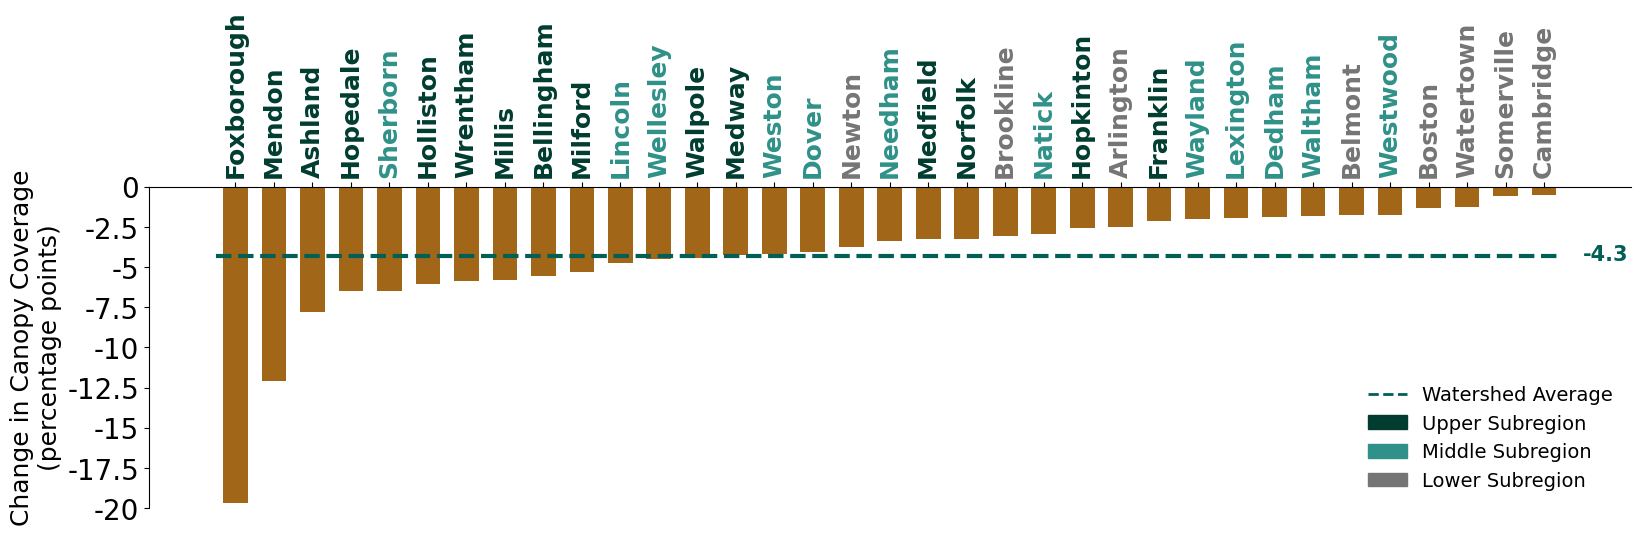

In [74]:
# Add barplot, set properties, and change colors for tree canopy change 2008 - 2021
cols = ['#003c30' if np.isin(x,Upper) else ('#2F9189' if np.isin(x,Middle) else '#757575') for x in townStats.name]
ax=sns.catplot(townStats,y='mean',x='name',orient='v',color='#a26619',
            kind='bar',height=4, aspect=4,saturation=1,width=0.8,gap=0.2,legend=False)
plt.hlines(y=-4.3,xmin=-.5,xmax=34.5,color='#015F56', linewidth=3,linestyle='--')
ax.set(xlabel=None)
plt.gca().xaxis.tick_top()
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['bottom'].set_visible(False)
plt.ylabel(ylabel='Change in Canopy Coverage\n(percentage points)',fontsize=18)
plt.xticks(rotation=90,fontsize=18,weight='bold')
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), cols):
    ticklabel.set_color(tickcolor)
plt.yticks(fontsize=20)
plt.ylim([-20,0])
l1 = mpl.lines.Line2D([], [], color='#015F56', linewidth=2,linestyle='--',label='Watershed Average')
l4 = mpl.patches.Patch(color='#003c30',label='Upper Subregion')
l5 = mpl.patches.Patch(color='#2F9189',label='Middle Subregion')
l6 = mpl.patches.Patch(color='#757575',label='Lower Subregion')
plt.gca().text(35,-4.6,'-4.3',fontsize=15,color='#015F56',weight='bold')
plt.legend(handles=[l1,l4,l5,l6],loc='lower right',fontsize=14,frameon=False)
ax.set_yticklabels(['-20','-17.5','-15','-12.5','-10','-7.5','-5','-2.5','0'], rotation=0)
plt.savefig('Output Maps/dTCC graph for publication.png',transparent=True,dpi=300,bbox_inches='tight')

# Soils Maps

In [188]:
#Import soils data and clip to boundaries for smaller working files
Soils = gpd.clip(gpd.read_file("../../Raw_Data/Soils_MassGIS_SHP/SOILS_MUPOLYGON_TOP20.shp",mask=CRW.to_crs('EPSG:26986')),CRW.to_crs('EPSG:26986'))
Soils.to_file('../../Working_Data/SoilsCRW.shp')  

<IPython.core.display.HTML object>

In [40]:
# Read in smaller working file
Soils=gpd.read_file('../../Working_Data/SoilsCRW.shp',driver='pyogrio')  

<IPython.core.display.HTML object>

In [189]:
# Define own hydric soils colormap
OWN_palette = {'No':'#f6ecd1','Unranked':'#e5e5e5','Yes':'#5bb2a8'}
OWN_cmap = mpl.colors.ListedColormap([OWN_palette[b] for b in ['No','Unranked','Yes']])

<IPython.core.display.HTML object>

In [192]:
# Recode drainage codes for reordering
drain_recode={
    'Excessively drained': 'A',
    'Somewhat excessively drained': 'B',
    'Well drained': 'C',
    'Moderately well drained': 'D',
    'Poorly drained': 'E',
    'Very poorly drained': 'F'
}
Soils['Drain_Code']=Soils['DRAINCLASS'].map(drain_recode)

<IPython.core.display.HTML object>

In [193]:
# Drainage custom colormap
colors5=['#dab972','#e5e5e5','#5bb2a8'] 
my_cmap5 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap5',colors5,N=6)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

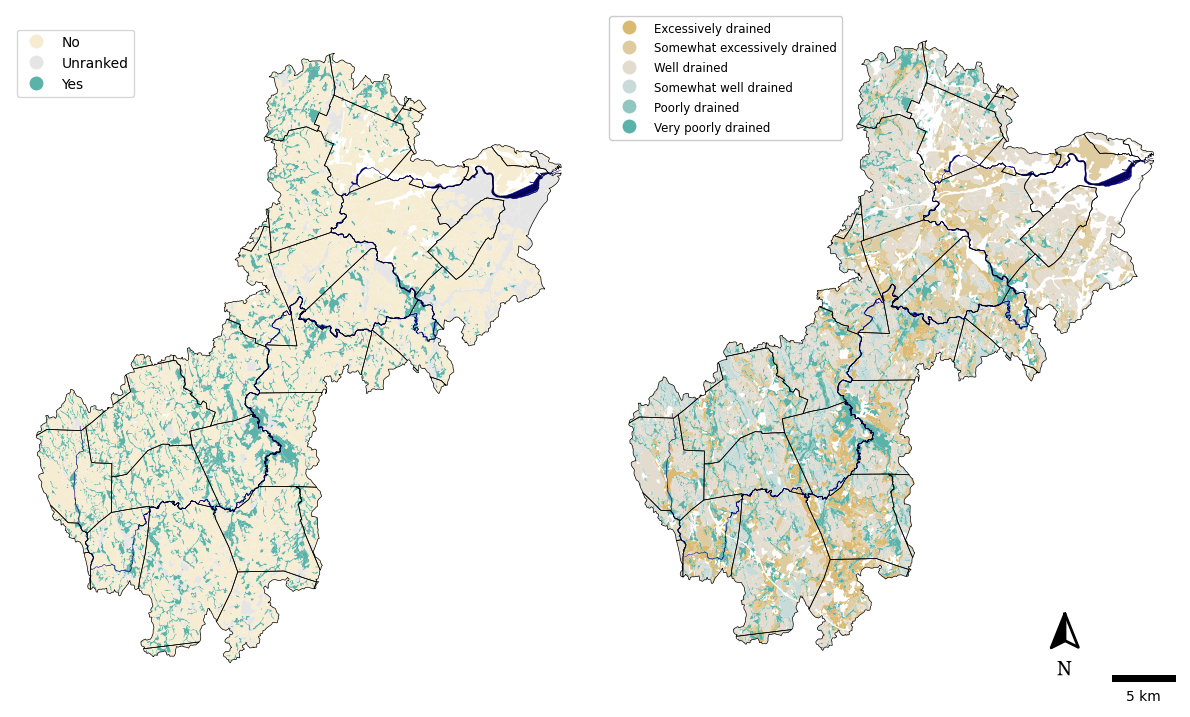

In [196]:
#Soil drainage and hydric soils map
fig, ax=plt.subplots(1,2,figsize=(12,8),width_ratios=[1,1],layout='tight')

Soils.plot(ax=ax[0],column='HYDRCRATNG',cmap=OWN_cmap,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')

# Drainage classes
Soils.to_crs(epsg=26986).plot(ax=ax[1],column='Drain_Code',cmap=my_cmap5,legend=True,legend_kwds={'loc':'upper left','framealpha':1})
leg1 = ax[1].get_legend()
new_legtxt = ['Excessively drained','Somewhat excessively drained','Well drained','Somewhat well drained','Poorly drained',
              'Very poorly drained','No Data']

#Fixing legend entries (because of recoding from earlier)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=8.5)

towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].add_artist(ScaleBar(1,location='lower right'))
ax[1].set_axis_off()
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)

plt.savefig("Output Maps/Hydric and Drainage for publication.png",transparent=True,dpi=300,bbox_inches='tight')

# EJ Pops

In [126]:
# Import EJ population data
EJPops=gpd.read_file('../../Raw_Data/EJ Data/EJ_POLY.shp',driver='pyogrio').clip(CRW)

<IPython.core.display.HTML object>

In [127]:
# Determine average 2021 canopy for each 'level' of EJ (the number of criteria met)
EJpops=EJPops.dissolve('EJ_CRITE_1')
EJStats=pd.DataFrame(rasterstats.zonal_stats(EJpops, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=EJpops.index)
EJStats

<IPython.core.display.HTML object>

min   max       mean   count  median
EJ_CRITE_1                                      
1           1.0  98.0  37.690166  162742    28.0
2           1.0  92.0  17.658578   16689    12.0
3           1.0  85.0  12.390785    3603     8.0

In [123]:
# Compare to overall stats from watershed
CRWStats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC2021.tif",stats="count min mean max median"))
CRWStats

<IPython.core.display.HTML object>

min   max       mean   count  median
0  1.0  98.0  53.692368  886934    60.0

<IPython.core.display.HTML object>

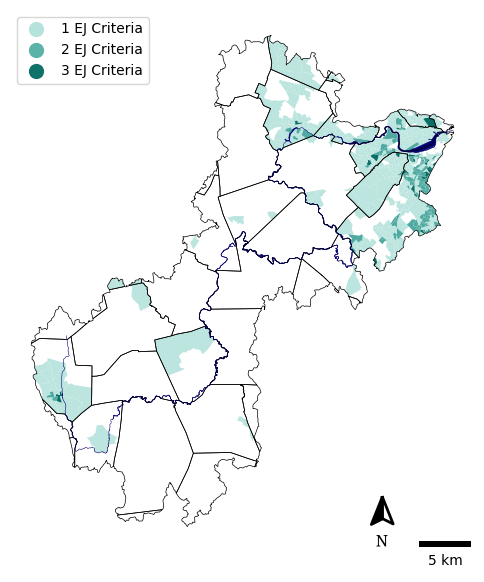

In [128]:
# Map EJ populations
fig,ax=plt.subplots(figsize=(6,8))
EJPops.plot(ax=ax,column='EJ_CRITE_1',cmap='BrBG',legend=False,norm=mpl.colors.BoundaryNorm(np.linspace(-4, 4, 36),ncolors=256),vmin=1,vmax=3)
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#b5e3dc', marker='o',markersize=12, label='1 EJ Criteria')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5bb2a8', marker='o',markersize=12, label='2 EJ Criteria')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0e726a', marker='o',markersize=12, label='3 EJ Criteria')
ax.legend(handles=[l1,l2,l3],loc='upper left')

ax.add_artist(ScaleBar(1,location='lower right'))
ax.axis('off')
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.8,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/EJ Pops for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# https://www.mass.gov/doc/healthy-soils-action-plan-2023/download and New England Landscape Futures data from Harvard forest

# Future Forest Scenarios from New England Landscape Futures

In [129]:
# Reproject all the New England Landscape Futures Data
scenarios=glob.glob('../../Raw_Data/NELF/*.tif')
dst_crs = 'EPSG:26986'
for fp in scenarios:
    with rio.open(fp) as src:
    
        transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
            with rio.open(fp[:-4]+'Reprojected.tif', 'w', **kwargs) as dst:
                for i in range(1, src.count + 1):
                    reproject(
                        source=rio.band(src, i),
                        destination=rio.band(dst, i),
                        src_transform=src.transform,
                        src_crs=src.crs,
                        dst_transform=transform,
                        dst_crs=dst_crs,
                        resampling=Resampling.nearest)

<IPython.core.display.HTML object>

In [228]:
# Import 2020 data and 2060 data and clip to watershed
CC20,trans=mask(rio.open('../../Raw_Data/NELF/cc_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GA20,trans=mask(rio.open('../../Raw_Data/NELF/ga_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GG20,trans=mask(rio.open('../../Raw_Data/NELF/gg_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
RT20,trans=mask(rio.open('../../Raw_Data/NELF/rt_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
YC20,trans=mask(rio.open('../../Raw_Data/NELF/yc_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

CC60,trans=mask(rio.open('../../Raw_Data/NELF/cc_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GA60,trans=mask(rio.open('../../Raw_Data/NELF/ga_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GG60,trans=mask(rio.open('../../Raw_Data/NELF/gg_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
RT60,trans=mask(rio.open('../../Raw_Data/NELF/rt_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
YC60,trans=mask(rio.open('../../Raw_Data/NELF/yc_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

<IPython.core.display.HTML object>

In [130]:
#Key for coding in NELF data: 
#1: High Density Development
#2: Low Density Development
#3: Unprotected Forest
#4: Conserved Forest
#5: Agriculture
#6: Other
#7: Water

<IPython.core.display.HTML object>

In [230]:
# Define own color schemes for mapping forest data only 
NELF_codes=[1,2,3,4,5,6,7]
NELF_colors=['#FFFFFF','#FFFFFF','#ABCD66','#5C8944','#FFFFFF','#FFFFFF','#060270']
NELF_cmap = mpl.colors.LinearSegmentedColormap.from_list('NELF', NELF_colors, N=7)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

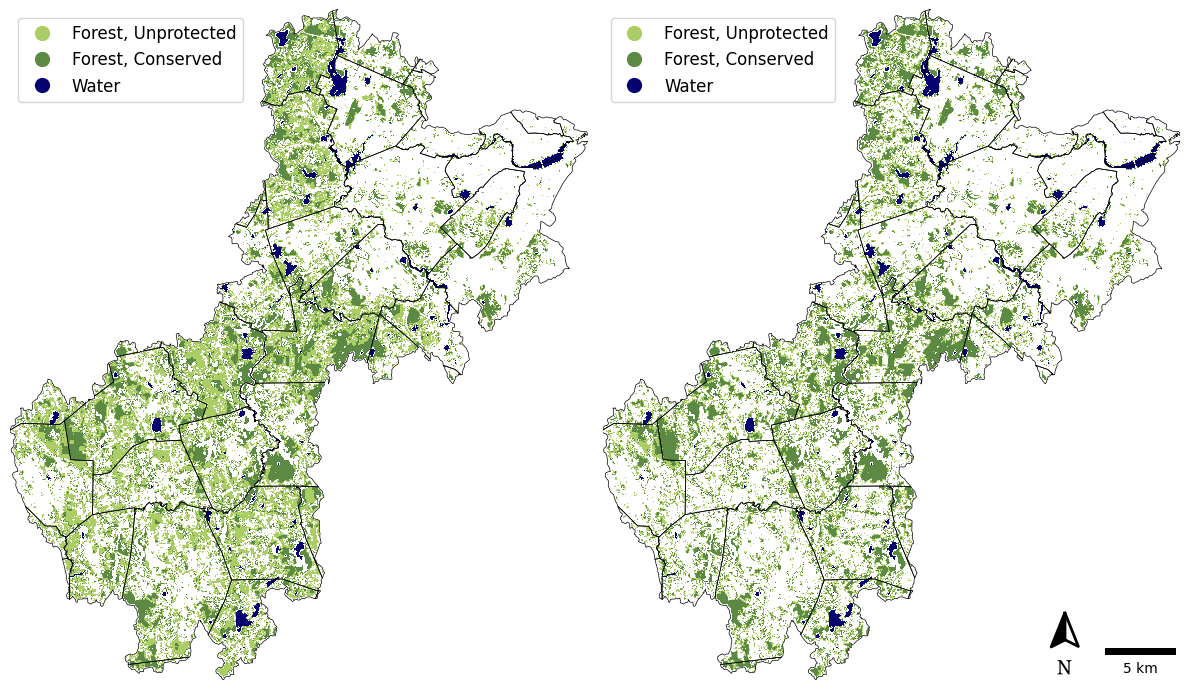

In [231]:
# Compare 2020 and 2060 protected and unprotected forest and water
fig, ax=plt.subplots(1,2,figsize=(12,8),width_ratios=[1,1],layout='tight')
show(RT20,ax=ax[0],cmap=NELF_cmap,vmin=1,vmax=7,extent=full_extent)
ax[0].axis('off')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#ABCD66', marker='o',markersize=12, label='Forest, Unprotected')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5C8944', marker='o',markersize=12, label='Forest, Conserved')
l7 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#060270', marker='o',markersize=12, label='Water')
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0],color='black',linewidth=0.5)
ax[0].legend(handles=[l3,l4,l7],loc='upper left',fontsize=12)

show(RT60,ax=ax[1],cmap=NELF_cmap,vmin=1,vmax=7,extent=full_extent)
ax[1].axis('off')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#ABCD66', marker='o',markersize=12, label='Forest, Unprotected')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5C8944', marker='o',markersize=12, label='Forest, Conserved')
l7 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#060270', marker='o',markersize=12, label='Water')
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1],color='black',linewidth=0.5)
ax[1].legend(handles=[l3,l4,l7],loc='upper left',fontsize=12)
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax[1].add_artist(ScaleBar(1,'m',location='lower right'))

fig.savefig('Output Maps/NELF RT forests 20_60.png',bbox_inches='tight',transparent=True,dpi=300)

In [77]:
# Statistics pulled from above map
unique, counts20 = np.unique(RT20.data, return_counts=True)
uf20=counts20[2]*900*2.47105381/10000
pf20=counts20[3]*900*2.47105381/10000
uf60=counts60[2]*900*2.47105381/10000
pf60=counts60[3]*900*2.47105381/10000
print('in 2020, there were '+str(uf20)+' acres of unprotected forests and '+str(pf20)+' acres of protected forests')
unique, counts60 = np.unique(RT60.data, return_counts=True)
print('by 2060, there is expected to be '+str(uf60)+' acres of unprotected forests and '+str(pf60)+' acres of protected forests')
print('delta unprotected='+str(uf60-uf20)+'\ndelta protected='+str(pf60-pf20))
print('delta unprotected='+str((uf60-uf20)/uf20*100)+'\ndelta protected='+str((pf60-pf20)/pf60*100))

<IPython.core.display.HTML object>

in 2020, there were 117484.3012639401 acres of unprotected forests and 75452.78793005459 acres of protected forests
by 2060, there is expected to be 63574.456975922694 acres of unprotected forests and 84447.769745988 acres of protected forests
delta unprotected=-53909.844288017404
delta protected=8994.98181593341
delta unprotected=-45.88684931351263
delta protected=10.6515327083114


In [97]:
# Look at statistics by town
forstats20=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns,'../../Raw_Data/NELF/rt_01Reprojected.tif',stats="count",categorical=True),index=Charles_Towns.index)
forstats20=forstats20[[3,4]]
forstats60=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns,'../../Raw_Data/NELF/rt_05Reprojected.tif',stats="count",categorical=True),index=Charles_Towns.index)
forstats60=forstats60[[3,4]]
forstats=forstats20.join(forstats60,rsuffix='.60',lsuffix='.20')
forstats['del3']=forstats['3.60']-forstats['3.20']
forstats['del4']=forstats['4.60']-forstats['4.20']
forstats['per3']=100*forstats['del3']/forstats['3.20']
forstats['per4']=100*forstats['del4']/forstats['4.20']
forstats.sort_values('per3')

<IPython.core.display.HTML object>

3.20     4.20     3.60     4.60    del3    del4  \
NAMELSAD20                                                                
Arlington town           9.0      NaN      3.0      NaN    -6.0     NaN   
Ashland town           347.0    574.0    146.0    631.0  -201.0    57.0   
Dover town           14604.0  11948.0   6495.0  14603.0 -8109.0  2655.0   
Foxborough town         48.0      NaN     24.0      NaN   -24.0     NaN   
Lincoln town          9276.0   7527.0   4670.0   9028.0 -4606.0  1501.0   
Sherborn town        17007.0   7204.0   8617.0  10291.0 -8390.0  3087.0   
Bellingham town      10046.0   2485.0   5098.0   2797.0 -4948.0   312.0   
Wrentham town         9967.0   3521.0   5061.0   4659.0 -4906.0  1138.0   
Waltham city          3055.0   3366.0   1557.0   3963.0 -1498.0   597.0   
Medway town          12480.0   1076.0   6365.0   1819.0 -6115.0   743.0   
Franklin Town city   20097.0   7980.0  10493.0   8539.0 -9604.0   559.0   
Millis town          10604.0   5967.0   5588.0   7049.0 -5016.0  1082.0   
Hopkinton town        4612.0    879.0   2432.0   1265.0 -2180.0   386.0   
Holliston town       19545.0  10248.0  10387.0  11245.0 -9158.0   997.0   
Norfolk town         17819.0   5228.0   9485.0   6400.0 -8334.0  1172.0   
Westwood town         3297.0   1816.0   1794.0   1914.0 -1503.0    98.0   
Natick town           6696.0   3800.0   3704.0   4338.0 -2992.0   538.0   
Medfield town         7615.0   8688.0   4312.0   8856.0 -3303.0   168.0   
Wellesley town        6900.0   3165.0   3925.0   3400.0 -2975.0   235.0   
Weston town          18584.0   8120.0  10796.0   9111.0 -7788.0   991.0   
Newton city           4163.0   3345.0   2454.0   3390.0 -1709.0    45.0   
Boston city           1239.0   4872.0    742.0   4936.0  -497.0    64.0   
Hopedale town         1200.0     22.0    730.0     22.0  -470.0     0.0   
Walpole town          3007.0   1299.0   1842.0   1383.0 -1165.0    84.0   
Wayland town           373.0    443.0    229.0    447.0  -144.0     4.0   
Dedham town           4467.0   2612.0   2761.0   2817.0 -1706.0   205.0   
Belmont town           380.0    640.0    235.0    640.0  -145.0     0.0   
Brookline town        2117.0   1093.0   1336.0   1095.0  -781.0     2.0   
Mendon town            431.0      5.0    274.0      5.0  -157.0     0.0   
Needham town          6502.0   5238.0   4143.0   5501.0 -2359.0   263.0   
Lexington town        2301.0   2525.0   1520.0   2614.0  -781.0    89.0   
Watertown Town city     21.0    140.0     14.0    140.0    -7.0     0.0   
Milford town         11335.0   2319.0   7890.0   2699.0 -3445.0   380.0   
Cambridge city           8.0     13.0      6.0     13.0    -2.0     0.0   
Somerville city          NaN      NaN      NaN      NaN     NaN     NaN   

                          per3       per4  
NAMELSAD20                                 
Arlington town      -66.666667        NaN  
Ashland town        -57.925072   9.930314  
Dover town          -55.525883  22.221292  
Foxborough town     -50.000000        NaN  
Lincoln town        -49.655024  19.941544  
Sherborn town       -49.332628  42.851194  
Bellingham town     -49.253434  12.555332  
Wrentham town       -49.222434  32.320364  
Waltham city        -49.034370  17.736185  
Medway town         -48.998397  69.052045  
Franklin Town city  -47.788227   7.005013  
Millis town         -47.302905  18.133065  
Hopkinton town      -47.267997  43.913538  
Holliston town      -46.855973   9.728728  
Norfolk town        -46.770301  22.417751  
Westwood town       -45.586897   5.396476  
Natick town         -44.683393  14.157895  
Medfield town       -43.374918   1.933702  
Wellesley town      -43.115942   7.424961  
Weston town         -41.907017  12.204433  
Newton city         -41.052126   1.345291  
Boston city         -40.112994   1.313629  
Hopedale town       -39.166667   0.000000  
Walpole town        -38.742933   6.466513  
Wayland town        -38.605898   0.902935  
Dedham town         -38.191180   7.848392  
Belmont town    

# Impervious Cover

In [508]:
# Mask data from NLCD (2021)
with rio.open('../../Raw_Data/NLCD/NLCD_2021_Impervious_L48_20230630_gFaEArJ6Oh9dOXkwqx9r.tiff') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src,
                                             shapes=CRW.to_crs(rio.open('../../Raw_Data/NLCD/NLCD_2021_Impervious_L48_20230630_gFaEArJ6Oh9dOXkwqx9r.tiff').crs).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("../../Working_Data/NLCD2021_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

#Reproject data from NLCD (2021)
dst_crs = 'EPSG:26986'

with rio.open("../../Working_Data/NLCD2021_masked.tif") as src:

    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
        with rio.open("../../Working_Data/NLCD2021.tif", 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

# Mask data from NLCD (2008)
with rio.open('../../Raw_Data/NLCD/NLCD_2008_Impervious_L48_20210604_gFaEArJ6Oh9dOXkwqx9r.tiff') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src,
                                             shapes=CRW.to_crs(rio.open('../../Raw_Data/NLCD/NLCD_2008_Impervious_L48_20210604_gFaEArJ6Oh9dOXkwqx9r.tiff').crs).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("../../Working_Data/NLCD2008_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

#Reproject data from NLCD (2008)
dst_crs = 'EPSG:26986'

with rio.open("../../Working_Data/NLCD2008_masked.tif") as src:

    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
        with rio.open("../../Working_Data/NLCD2008.tif", 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)
     

<IPython.core.display.HTML object>

In [559]:
# Import reprojected and masked data
NLCD2008,trans=mask(rio.open('../../Working_Data/NLCD2008.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
NLCD2021,trans=mask(rio.open('../../Working_Data/NLCD2021.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

<IPython.core.display.HTML object>

In [585]:
# 2008 impervious surface data statistics
ImpStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/NLCD2008.tif",stats="count min mean max median"),index=CRW.index)
ImpStats

<IPython.core.display.HTML object>

min    max       mean   count  median
0  0.0  100.0  16.071523  389607     0.0

In [586]:
# 2021 impervious surface data statistics
ImpStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/NLCD2021.tif",stats="count min mean max median"),index=CRW.index)
ImpStats

<IPython.core.display.HTML object>

min    max       mean   count  median
0  0.0  100.0  17.538307  389607     0.0

<IPython.core.display.HTML object>

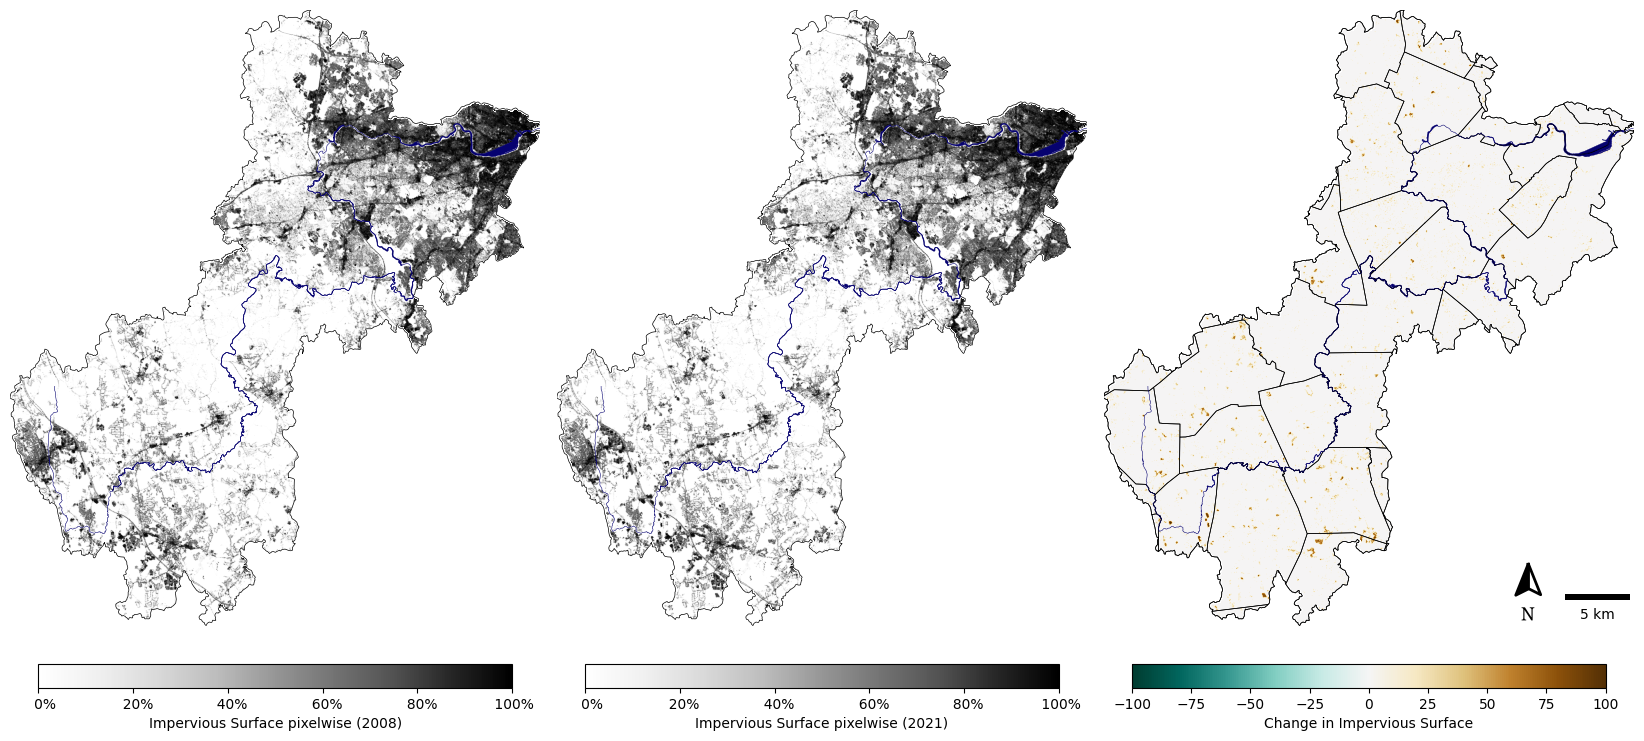

In [577]:
# Plot 2008 and 2021 impervious surface and the change
fig,ax=plt.subplots(1,3,figsize=(18,8),layout='tight')

hidden=ax[0].imshow(NLCD2008[0,:,:],cmap='Greys',extent=full_extent)
fig.colorbar(hidden,orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,format='%4i%%',label='Impervious Surface pixelwise (2008)')
show(NLCD2008,ax=ax[0],cmap='Greys',extent=full_extent)
CRW.boundary.plot(ax=ax[0],color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')

hidden=ax[1].imshow(NLCD2021[0,:,:],cmap='Greys',extent=full_extent)
fig.colorbar(hidden,orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,format='%4i%%',label='Impervious Surface pixelwise (2021)')
show(NLCD2021,ax=ax[1],cmap='Greys',extent=full_extent)
CRW.boundary.plot(ax=ax[1],color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].axis('off')

hidden=ax[2].imshow((NLCD2021-NLCD2008)[0,:,:],cmap='BrBG_r',extent=full_extent,vmin=-100,vmax=100)
fig.colorbar(hidden,orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Change in Impervious Surface')
show(NLCD2021-NLCD2008,ax=ax[2],cmap='BrBG_r',extent=full_extent,vmin=-100,vmax=100)
CRW.boundary.plot(ax=ax[2],color='black',linewidth=0.5)
ax[2].axis('off')
towns.to_crs(epsg=26986).boundary.plot(ax=ax[2], color='black',linewidth=0.5)
Charles.plot(ax=ax[2],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[2],color='#060270',linewidth=0.4)
add_north_arrow(ax=ax[2],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax[2].add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/Impervious Surfaces.png',dpi=300,transparent=True,bbox_inches='tight')

# Heat

In [132]:
# Obtain relevant scaling data so the data can be rescaled for just the watershed (and no the whole MAPC area)
scale=pd.DataFrame(rasterstats.zonal_stats(CRW, "../../Raw_Data/Heat/LST_index_normwater_mapc.tif",stats="count min mean max median"),index=CRW.index)

<IPython.core.display.HTML object>

In [133]:
# Read heat index data and vectorize it. Also extract top and lower half of index in region
heat=rioxarray.open_rasterio("../../Raw_Data/Heat/LST_index_normwater_mapc.tif")
heat=heat.rio.clip(CRW.geometry)
heat=vectorize(heat.astype('float32'))
heat['_data']=(heat['_data']-scale['min'][0])/(scale['max'][0]-scale['min'][0])
cool=heat[heat['_data']<0.5].dissolve(as_index=False)
heat=heat[heat['_data']>=0.5].dissolve(as_index=False)

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\geocube\vector.py:62: UserWarning: The array has no name. Column name defaults to _data
  warnings.warn("The array has no name. Column name defaults to _data")


In [136]:
# Tree canopy stats for the heat data
heat_stats=pd.DataFrame(rasterstats.zonal_stats(heat,'../../Working_Data/TCC2021.tif',stats="mean"),index=cool.index)
cool_stats=pd.DataFrame(rasterstats.zonal_stats(cool,'../../Working_Data/TCC2021.tif',stats="mean"),index=cool.index)
print('The hottest 50% of areas have ',heat_stats['mean'][0],'% tree canopy on average')
print('The coolest 50% of areas have ',cool_stats['mean'][0],'% tree canopy on average')

<IPython.core.display.HTML object>

The hottest 50% of areas have  12.162693939795783 % tree canopy on average
The coolest 50% of areas have  56.742696194774624 % tree canopy on average


<IPython.core.display.HTML object>

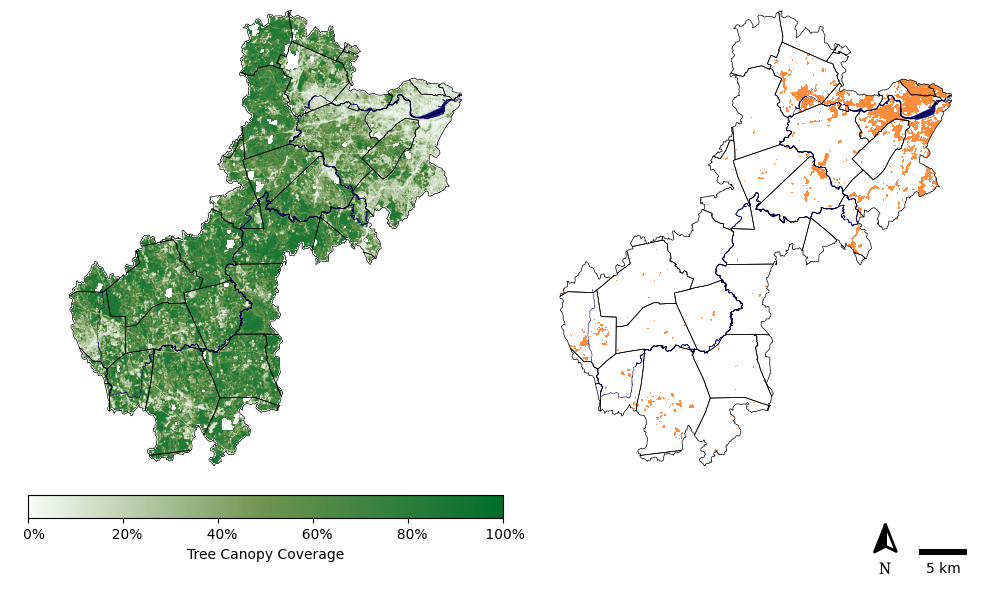

In [36]:
# Maps comparing tree canopy and hottest half of the watershed
fig,ax=plt.subplots(1,2,figsize=(12,6),layout='tight')

hidden = ax[0].imshow(TCC2021[0,:,:],cmap=my_greens,extent=plot_extent,alpha=1,vmin=0,vmax=100)
show(TCC2021,cmap=my_greens,ax=ax[0],extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')
plt.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Tree Canopy Coverage')

towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
heat.plot(ax=ax[1],color='#fd8d3c')
ax[1].add_artist(ScaleBar(1,location='lower right'))
ax[1].axis('off')
ax[1].set_ylim([852000,911600])
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
plt.savefig('Output Maps/Heat Ranking and Trees.png',transparent=True,dpi=300,bbox_inches='tight')

# Open Space

In [138]:
# Import open space data
OS = gpd.read_file('../../Raw_Data/OpenSpace/OPENSPACE_POLY.shp',driver='pyogrio').clip(CRW)
print('There is ',OS.dissolve().geometry[0].area*2.47105381/10000,' acres of open space in the Charles River Watershed')
print('That represents ',100*OS.dissolve().geometry[0].area/CRW.dissolve().geometry[0].area,'% of the total area of the watershed')

<IPython.core.display.HTML object>

There is  45276.79866574955  acres of open space in the Charles River Watershed
That represents  22.759025504176194 % of the total area of the watershed


## Level of Protection

In [352]:
# Recode level of protection and create custom color map
LOP_recode={
    'P': 'A',
    'T': 'B',
    'L': 'C',
    'N': 'D',
    'X': 'E'
}
OS['LOP_Recode']=OS['LEV_PROT'].map(LOP_recode)

LOP_palette = {'A':'#238b45','B':'#74c476','C':'#c7e9c0','D':'#9B4832','E':'#6E756B'}
LOP_cmap = mpl.colors.ListedColormap([LOP_palette[b] for b in ['A','B','C','D','E']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

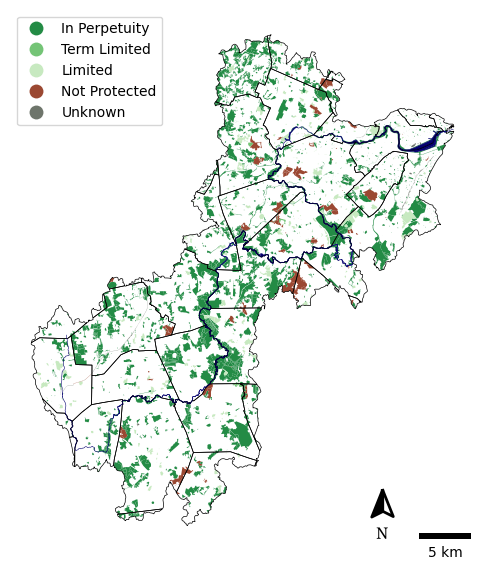

In [353]:
# Map open space by level of protection 
fig,ax=plt.subplots(figsize=(6,8))

OS.plot(ax=ax,column='LOP_Recode',legend=True,cmap=LOP_cmap,legend_kwds={'loc':'upper left'})
leg1 = ax.get_legend()
new_legtxt = ['In Perpetuity','Term Limited','Limited','Not Protected','Unknown']

#Fixing legend entries (because of earlier recoding)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    
ax.axis('off')
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.8,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)


fig.savefig('Output Maps/Open Space Protection for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [354]:
# Percent of open space at each level of protection
LOP=OS.dissolve('LEV_PROT')[['geometry']]
(LOP.geometry.area*2.47105381/10000)/(LOP.geometry.area*2.47105381/10000).sum()*100

<IPython.core.display.HTML object>


LEV_PROT
L     9.940619
N     8.320464
P    80.971617
T     0.301471
X     0.465830
dtype: float64

In [355]:
# Area of open space within each level of protection 
(LOP.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


LEV_PROT
L     4500.793891
N     3767.239772
P    36661.355796
T      136.496247
X      210.912959
dtype: float64

In [356]:
# Area in acres of tree canopy in each open space by level of protection 
LOPStats=pd.DataFrame(rasterstats.zonal_stats(LOP, "../../Working_Data/TCC2021.tif",stats="mean"),index=LOP.index)
LOPStats['mean']/100*(LOP.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


LEV_PROT
L     2186.407639
N     2046.367136
P    25236.200477
T       80.503649
X       94.745193
dtype: float64

In [357]:
# Area of total open space canopy that is on each type of open space by level of protection 
LOPStats['mean']/100*(LOP.geometry.area*2.47105381/10000)/((LOPStats['mean']/100*(LOP.geometry.area*2.47105381/10000)).sum())*100

<IPython.core.display.HTML object>


LEV_PROT
L     7.375493
N     6.903089
P    85.130245
T     0.271566
X     0.319608
dtype: float64

In [358]:
# Mean canopy coverage on open space by each level of protection 
LOPStats['mean']

<IPython.core.display.HTML object>


LEV_PROT
L    48.578266
N    54.320066
P    68.835972
T    58.978654
X    44.921466
Name: mean, dtype: float64

## Ownership

In [232]:
#Discovered one property with missing ownership data and manually assigned to unknown and updated Rail Trail ownership
OS.loc[30889,'OWNER_TYPE']='F'
OS[OS.SITE_NAME=='Upper Charles River Rail Trail'].loc['OWNER_TYPE']='M'

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Local\Temp\ipykernel_29968\1606126347.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  OS[OS.SITE_NAME=='Upper Charles River Rail Trail'].loc['OWNER_TYPE']='M'


In [364]:
# Recoding ownership and defining custom colormap
OWN_recode={
    'M':'A',
    'P':'B',
    'S':'C',
    'L':'D',
    'F':'E',
    'N':'F',
    'B':'G',
    'O':'H',
    'X':'I'
}
OS['OWN_Recode']=OS['OWNER_TYPE'].map(OWN_recode)

OWN_palette = {'A':'#5BB3A8','B':'#cfa155','C':'#258880','D':'#74c476','E':'#015F56','F':'#995d13','G':'#238b45','H':'#7b7373','I':'#281D19'}
OWN_cmap = mpl.colors.ListedColormap([OWN_palette[b] for b in ['A','B','C','D','E','F','G','H','I']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

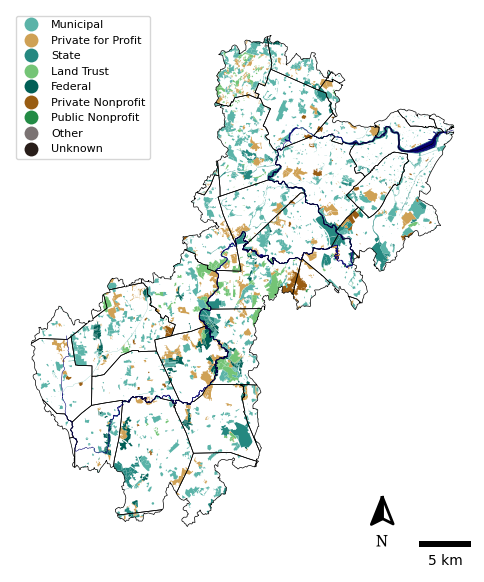

In [368]:
# Ownership map for open space
fig,ax=plt.subplots(figsize=(6,8))
OS.plot(ax=ax,column='OWN_Recode',legend=True,cmap=OWN_cmap,legend_kwds={'loc':'upper left','fontsize':8})
leg1 = ax.get_legend()
new_legtxt = ['Municipal','Private for Profit','State','Land Trust','Federal','Private Nonprofit','Public Nonprofit','Other','Unknown']

#Fixing legend entries (because of recoding)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.8,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/Open Space Ownership for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [139]:
# Area of each ownership type in acres
(OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000)

<IPython.core.display.HTML object>


OWNER_TYPE
B       21.763356
F     3356.097689
L     4856.738653
M    19411.296780
N     1788.084031
O       20.594972
P     9163.429680
S     6639.449582
X        9.373398
dtype: float64

In [140]:
# Percent of open space in each ownership type
(OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000)/sum(OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000)*100

<IPython.core.display.HTML object>


OWNER_TYPE
B     0.048078
F     7.414033
L    10.729134
M    42.881946
N     3.950098
O     0.045497
P    20.243145
S    14.667362
X     0.020707
dtype: float64

In [141]:
# acres of tree canopy on open space by ownership type
OSStats=pd.DataFrame(rasterstats.zonal_stats(OS.dissolve('OWNER_TYPE'), "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=OS.dissolve('OWNER_TYPE').index)
OSStats['mean']*OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000*(1/100)

<IPython.core.display.HTML object>


OWNER_TYPE
B       14.867093
F     2210.010433
L     3718.461929
M    12757.807982
N     1050.841175
O        5.618220
P     5538.815353
S     4332.507308
X        3.938957
dtype: float64

In [142]:
# percent of open space tree canopy on each type of open space by ownership type
(OSStats['mean']*OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000*(1/100))/((OSStats['mean']*OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000*(1/100)).sum())*100

<IPython.core.display.HTML object>


OWNER_TYPE
B     0.050171
F     7.457970
L    12.548437
M    43.052896
N     3.546201
O     0.018959
P    18.691459
S    14.620614
X     0.013293
dtype: float64

In [143]:
# average canopy coverage by ownership type 
OSStats['mean']

<IPython.core.display.HTML object>


OWNER_TYPE
B    68.312500
F    65.850599
L    76.562941
M    65.723625
N    58.769116
O    27.279570
P    60.444785
S    65.254013
X    42.022727
Name: mean, dtype: float64

## Statistics

In [109]:
# Overall open space canopy statistics
OSStats=pd.DataFrame(rasterstats.zonal_stats(OS.dissolve(), "../../Working_Data/TCC2021.tif",stats="mean"))
OSStats['mean']

<IPython.core.display.HTML object>


0    65.467792
Name: mean, dtype: float64

# Parcel Data

In [146]:
# I clipped this in ArcGIS because was so large and had to combine east and west
Parcels=gpd.read_file('../../Working_Data/ParcelsClipped_fromstate.shp',driver='pyogrio')

<IPython.core.display.HTML object>

In [147]:
# Extracting unique use codes from the parcel data
codes=Parcels.USE_CODE.unique()
codes=codes[codes != np.array(None)]
codes.sort()
np.savetxt("../../Working_Data/ParcelsUseCodes.csv", codes,fmt='%s', delimiter=",")
#https://www.mass.gov/doc/property-type-classification-codes-non-arms-length-codes-and-sales-report-spreadsheet/download

<IPython.core.display.HTML object>

In [158]:
# Reading in my land use categories and public/private crosswalks and using them through a merge
public=pd.read_csv('../../Working_Data/ParcelsUseCodes_CONVERTER.csv')
genCats=pd.read_csv('../../Working_Data/ParcelsUseCodes_CONVERTER_GeneralCats.csv')
Parcels_wPublic=Parcels.merge(public, on='USE_CODE')
Parcels_GEN=Parcels.merge(genCats, on='USE_CODE')

<IPython.core.display.HTML object>

In [224]:
# Fixing bad geometries in parcel data
bad_geos_indexes=Parcels_wPublic[~Parcels_wPublic.geometry.is_valid].index
for i in bad_geos_indexes:
    Parcels_wPublic.geometry[i]=shapely.validation.make_valid(Parcels_wPublic.geometry[i])

bad_geos_indexes=Parcels_GEN[~Parcels_GEN.geometry.is_valid].index
for i in bad_geos_indexes:
    Parcels_GEN.geometry[i]=shapely.validation.make_valid(Parcels_GEN.geometry[i])

<IPython.core.display.HTML object>

In [190]:
# Recode and define own palette
Land_recode={
    'Residential':'A',
    'Governmental':'B',
    'Recreational':'C',
    'Other':'D',
    'Industrial':'E',
    'Commercial':'F',
    'Institutional':'G',
    'Agricultural':'H',
    'Forest':'I',
    'Open Space':'J',
    'ROW':'K'
}
Parcels_GEN['Land_Recode']=Parcels_GEN['GenCats'].map(Land_recode)

palette = {'A':'#543005',
           'B':'#0e726a',
           'C':'#006d2c',
           'D':'#e3e3e3',
           'E':'#c1c1c1',
           'F':'#7c4809',
           'G':'#b5e3dc',
           'H':'#c48a38',
           'I':'#757575',
           'J':'#41ab5d',
           'K':'#00441b'}
new_cmap = mpl.colors.ListedColormap([palette[b] for b in ['A','B','C','D','E','F','G','H','I','J','K']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

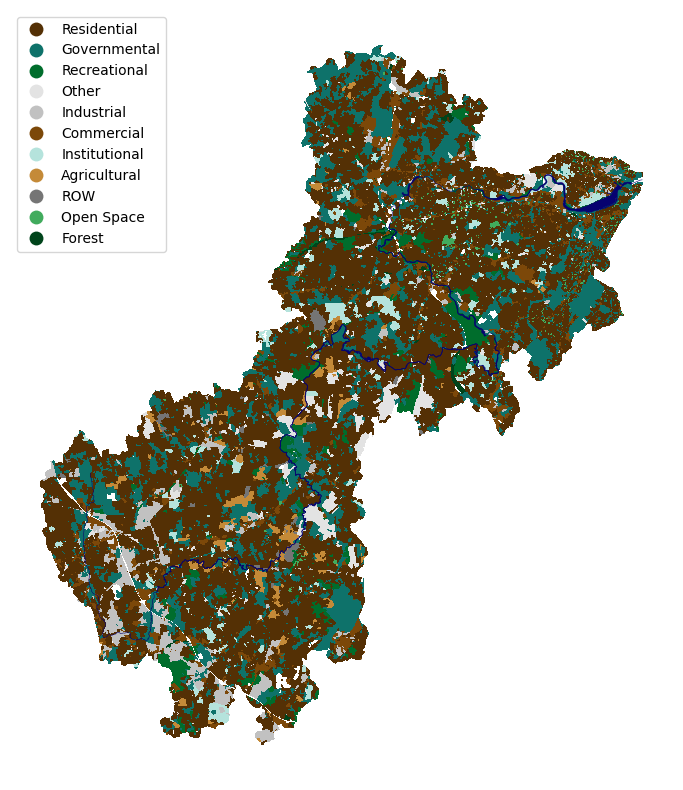

In [194]:
# Map underlying land use category data
fig,ax=plt.subplots(figsize=(10,10))
Parcels_GEN.plot(ax=ax,column='Land_Recode',antialiased=False,cmap=new_cmap,legend=True,legend_kwds={'loc':'upper left'})
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

leg1 = ax.get_legend()
new_legtxt = ['Residential','Governmental','Recreational','Other','Industrial',
                                                           'Commercial','Institutional','Agricultural','ROW','Open Space','Forest']

#Fixing legend entries (because of recoding)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])

ax.axis('off')
fig.savefig('Output Maps/Land Categories.png',dpi=300,transparent=True,bbox_inches='tight')

In [195]:
# Dissolve parcel data by general land use categories
Parcels_GEN=Parcels_GEN.dissolve('GenCats')

<IPython.core.display.HTML object>

In [196]:
# Average canopy coverage by land use type over time 
ParGENStats=pd.DataFrame(rasterstats.zonal_stats(Parcels_GEN, "../../Working_Data/TCC2021.tif",stats="mean"),index=Parcels_GEN.index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(Parcels_GEN, "../../Working_Data/TCC"+year+".tif",stats="mean"),index=Parcels_GEN.index)
    ParGENStats=ParGENStats.join(stats,rsuffix=year)
ParGENStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageCanopy over time by Land Use.csv')

<IPython.core.display.HTML object>

In [226]:
# Clean canopy coverage by land use type over time data
CanParData=pd.read_csv('../../Working_Data/AverageCanopy over time by Land Use.csv')
CanParData=pd.melt(CanParData,id_vars='GenCats',var_name='Year')
for i in CanParData.index:
    CanParData.loc[i,'Year']=CanParData['Year'].iloc[i][-4:]

<IPython.core.display.HTML object>

In [198]:
# Further reorganize data using pivot table
CanParData=CanParData.pivot(columns='GenCats',index='Year')

<IPython.core.display.HTML object>

In [199]:
# Calculate area of each land use category
areas=(Parcels_GEN.geometry.area*2.47105381/10000)
areas

<IPython.core.display.HTML object>


GenCats
Agricultural      3946.599934
Commercial       10356.120258
Forest            1790.940654
Governmental     38949.389932
Industrial        8603.923033
Institutional     6568.473583
Open Space        2773.543608
Other             6065.554419
ROW                569.627279
Recreational      7360.799406
Residential      97070.570011
dtype: float64

In [200]:
# Convert canopy coverage percent to acres
for col in CanParData.columns:
    CanParData[col]=CanParData[col]*areas[col[1]]/100

<IPython.core.display.HTML object>

In [201]:
# Extract data of interest
CanParData=CanParData.value[['Residential','Governmental','Recreational','Other','Industrial','Commercial','Institutional',
                             'Agricultural','Forest','Open Space','ROW']]

<IPython.core.display.HTML object>

In [202]:
# Percent change by land use type
100*(CanParData.T['2021']-CanParData.T['2008'])/CanParData.T['2008']

<IPython.core.display.HTML object>


GenCats
Residential     -6.408536
Governmental    -5.444623
Recreational    -4.098023
Other           -6.077956
Industrial      -9.116877
Commercial      -6.974028
Institutional   -4.518356
Agricultural    -6.304118
Forest          -6.602309
Open Space      -9.293299
ROW              0.433550
dtype: float64

<IPython.core.display.HTML object>

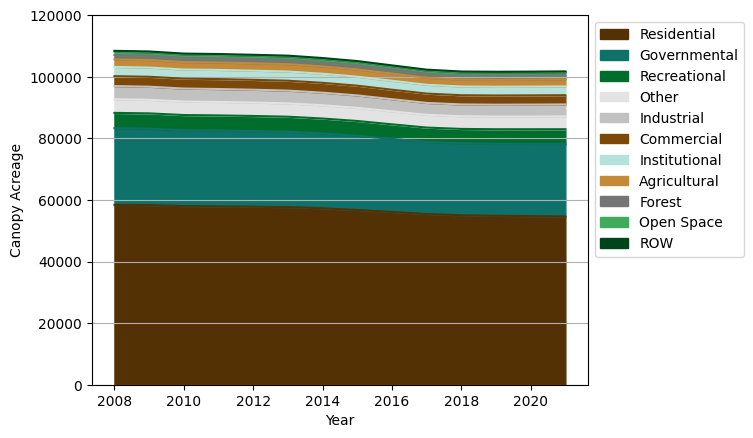

In [203]:
#Canopy acreage by land use type over time
ax=CanParData.plot.area(stacked=True,legend=True,cmap=new_cmap)
ax.set(ylabel='Canopy Acreage',xlabel='Year')
ax.set_ylim([0,120000])
legend=ax.get_legend()
legend.set_title('')
ax.grid(which='major',axis='y',visible=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig('Output Maps/Canopy by Land use type.png',dpi=300,transparent=True,bbox_inches='tight')

In [204]:
# dissolve parcels by public and private ownership
Parcels_dissolved=Parcels_wPublic.dissolve('Public',as_index=False)

<IPython.core.display.HTML object>

In [205]:
# Do this but for each subregion 
Parcels_U=Parcels_wPublic.clip(CRW_Upper).dissolve('Public')
Parcels_M=Parcels_wPublic.clip(CRW_Middle).dissolve('Public')
Parcels_L=Parcels_wPublic.clip(CRW_Lower).dissolve('Public')

<IPython.core.display.HTML object>

In [34]:
# Average tree canopy coverage (%) by ownership for the upper subregion 
ParStats_U=pd.DataFrame(rasterstats.zonal_stats(Parcels_U, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Parcels_U.index)
ParStats_U

<IPython.core.display.HTML object>

min   max       mean   count  median
Public                                      
R       1.0  96.0  58.496940  272508    66.0
U       1.0  97.0  65.895543   82627    79.0
X       2.0  93.0  46.391371    7139    43.0

In [35]:
# As area of tree canopy
(ParStats_U['mean']/100)*Parcels_U.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


Public
R    35459.465119
U    12176.857426
X      736.752863
dtype: float64

In [36]:
#Average canopy coverage (%) for just the Middle subregion by ownership 
ParStats_M=pd.DataFrame(rasterstats.zonal_stats(Parcels_M, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Parcels_M.index)
ParStats_M

<IPython.core.display.HTML object>

min   max       mean   count  median
Public                                      
R       1.0  97.0  59.492863  219057    68.0
U       1.0  96.0  63.852691   76920    79.0
X       2.0  95.0  52.598302    2945    57.0

In [37]:
# As area of tree canopy
(ParStats_M['mean']/100)*Parcels_M.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


Public
R    29033.766851
U    11357.874109
X      347.947337
dtype: float64

In [38]:
# For lower subregion
ParStats_L=pd.DataFrame(rasterstats.zonal_stats(Parcels_L, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Parcels_L.index)
ParStats_L

<IPython.core.display.HTML object>

min   max       mean   count  median
Public                                      
R       1.0  94.0  32.730085  105722    26.0
U       1.0  95.0  39.335596   41392    28.0
X       2.0  93.0  30.322111    8525    22.0

In [39]:
# as area of tree canopy
(ParStats_L['mean']/100)*Parcels_L.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


Public
R    7709.916435
U    3684.075842
X     575.446477
dtype: float64

In [206]:
# tree canopy cover (%) for whole watershed
ParStats=pd.DataFrame(rasterstats.zonal_stats(Parcels_dissolved, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Parcels_dissolved.Public)
ParStats

<IPython.core.display.HTML object>

min   max       mean   count  median
Public                                      
R       1.0  97.0  54.301283  597288    61.0
U       1.0  97.0  59.638088  200955    74.0
X       2.0  95.0  40.010156   18610    32.0

In [207]:
my_palette = {'R':'#ecd8a5','U':'#5bb2a8','X':'#d5d5d5'}
my_cmap10 = mpl.colors.ListedColormap([my_palette[b] for b in ['R','U','X']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

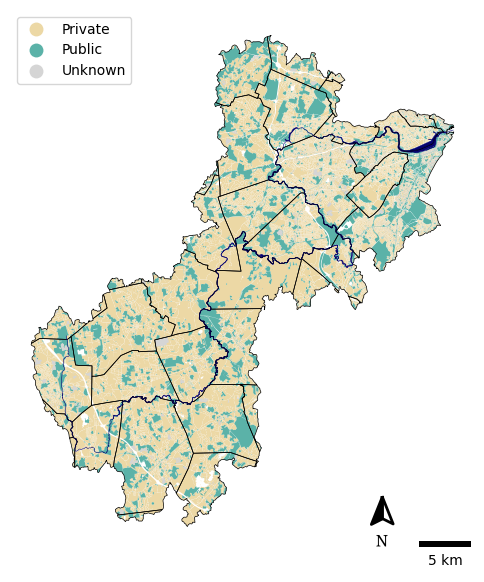

In [209]:
# Plot of ownership for the watershed
fig,ax=plt.subplots(figsize=(6,8))

Parcels_dissolved.plot(ax=ax,column='Public',cmap=my_cmap10,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)


leg1 = ax.get_legend()
new_legtxt = ['Private','Public','Unknown']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/Parcel public private for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [210]:
# Stats of tree canopy coverage by ownership type for each town
Parcels_towns_dissolved=Parcels_wPublic.dissolve(['Public','TOWN_ID'],as_index=False).sort_values('TOWN_ID')
Parcels_towns_stats=pd.DataFrame(rasterstats.zonal_stats(Parcels_towns_dissolved, "../../Working_Data/TCC2021.tif",stats="mean"),index=Parcels_towns_dissolved.index)

<IPython.core.display.HTML object>

In [211]:
# Converts town codes to town names
town_dict={
    10: 'Arlington',
    14: 'Ashland',  
    25:'Bellingham',  
    26: 'Belmont',  
    35:'Boston',  
    46:'Brookline',  
    49: 'Cambridge',  
    73:'Dedham',  
    78: 'Dover',  
    99:'Foxborough', 
    101:'Franklin', 
    136: 'Holliston', 
    138: 'Hopedale',
    139:'Hopkinton', 
    155:'Lexington', 
    157:'Lincoln', 
    175:'Medfield', 
    177:'Medway', 
    179:'Mendon', 
    185:'Milford', 
    187:'Millis', 
    198:'Natick', 
    199:'Needham', 
    207:'Newton', 
    208:'Norfolk', 
    269:'Sherborn',
    274:'Somerville', 
    307:'Walpole', 
    308:'Waltham', 
    314:'Watertown', 
    315:'Wayland', 
    317:'Wellesley', 
    333:'Weston', 
    335:'Westwood', 
    350:'Wrentham'
}

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

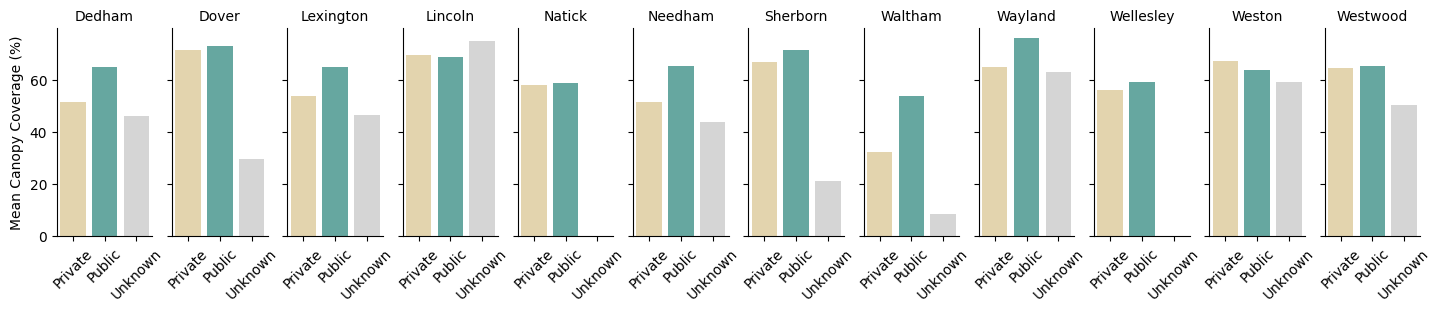

In [213]:
# Join stats and clean them to make a plot
Parcels_statsbytown=Parcels_towns_dissolved.join(Parcels_towns_stats)[['Public','TOWN_ID','mean']]
Parcels_statsbytown=Parcels_statsbytown.replace({"TOWN_ID": town_dict})
Parcels_statsU=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Upper)]
Parcels_statsM=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Middle)]
Parcels_statsL=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Lower)]
ax=sns.catplot(
    data=Parcels_statsM.sort_values(['TOWN_ID','Public']), x="Public", y="mean", col="TOWN_ID",
    kind="bar", height=3, aspect=.4,hue='Public',orient='v',palette=my_palette
)
ax.set_titles(col_template="{col_name}")
ax.set(ylabel='Mean Canopy Coverage (%)',xlabel='')
ax.set_xticklabels(labels=['Private','Public','Unknown'],rotation=45)
plt.savefig('Output Maps/Canopy by Town (2021).png',dpi=300,transparent=True,bbox_inches='tight')

<IPython.core.display.HTML object>

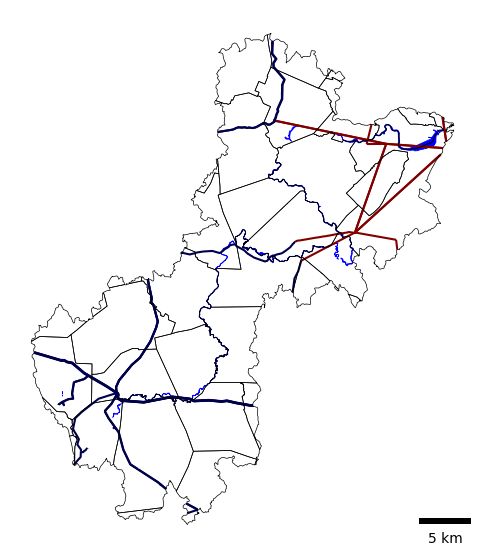

In [232]:
TL=gpd.read_file('../../Raw_Data/Transmission Lines/Electric_Power_Transmission_Lines_A.shp',driver='pyogrio').to_crs(epsg=26986).clip(CRW)
fig,ax=plt.subplots(figsize=(6,8))
TL.plot(ax=ax,column='TYPE',legend=False,cmap='seismic',legend_kwds={'loc':'upper left'})
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='blue',edgecolor='blue',linewidth=0.5)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/Transmission Lines.png',dpi=300,bbox_inches='tight',transparent=True)

In [ ]:
gas=gpd.read_file('../../Raw_Data/Gas Lines/NaturalGas_InterIntrastate_Pipelines_US_EIA.shp',driver='pyogrio').to_crs(epsg=26986).clip(CRW)
fig,ax=plt.subplots(figsize=(6,8))
gas.plot(ax=ax,color='red')
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='blue',edgecolor='blue',linewidth=0.5)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/Gas Lines.png',dpi=300,bbox_inches='tight',transparent=True)

# Tree Ordinances

In [317]:
# Merge tree ordinance data onto towns
Ords=Charles_Towns.sort_values(by='name')
Ords=Ords.merge(pd.read_csv('../../Raw_Data/Tree Ordinances.csv'),left_on='name',right_on='Municipality')

<IPython.core.display.HTML object>

In [85]:
# Define own custom palettes for map making below
Ord_palette = {'No':'#74c476','Yes':'#e5e5e5'}
Ord_cmap = mpl.colors.ListedColormap([Ord_palette[b] for b in ['Yes','No']])
Pol_palette = {'Both':'#00441b','Natural Resources Commission':'#a1d99b','Warden':'#41ab5d','Warden+':'#006d2c'}
Pol_cmap = mpl.colors.ListedColormap([Pol_palette[b] for b in ['Both','Natural Resources Commission','Warden','Warden+']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

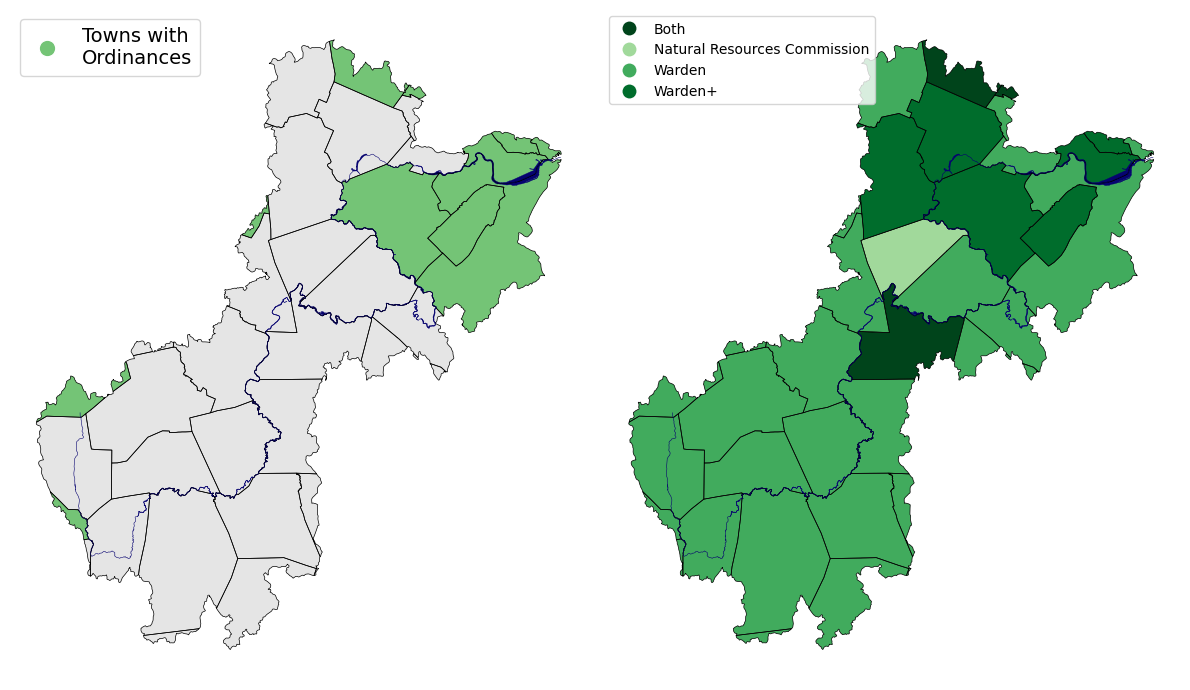

In [174]:
# Make map
fig,ax=plt.subplots(1,2,figsize=(12,8),layout='tight')
Ords.plot(ax=ax[0],column='Tree Ordinance',cmap=Ord_cmap,legend=False)

l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#74c476', marker='o',markersize=12, label='Towns with\nOrdinances')
ax[0].legend(handles=[l1],fontsize=14,loc='upper left')

towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')

Ords.plot(ax=ax[1],column='Tree Committee/Tree Warden',cmap=Pol_cmap,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].axis('off')

fig.savefig('Output Maps/Ordinances and Policies',dpi=300,transparent=True,bbox_inches='tight')

# TNC Conservation Priority Data

In [216]:
# Load conservation priority data
HP_cons_opps=gpd.read_file('../../Raw_Data/TNC_Cons/High Level Conservation Opp/High Priority Conservation Opportunities/High Priority Conservation Opportunities.shp').to_crs(epsg=26986)

<IPython.core.display.HTML object>

In [217]:
# Subset to only high priority conservation opportunities
HP_cons_opps=HP_cons_opps[HP_cons_opps.Priority=='High Priority']

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

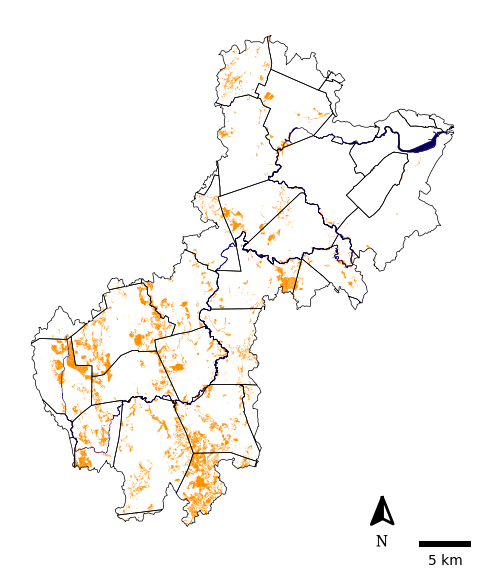

In [218]:
# Map high priority conservation opportunities
fig,ax=plt.subplots(figsize=(6,8))
HP_cons_opps.plot(ax=ax,color='#ff9101')
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/High Priority Conservation Areas.png',dpi=300,transparent=True,bbox_inches='tight')

In [219]:
# Make copies of parcel data with just one ownership type
Private=Parcels_dissolved[Parcels_dissolved.Public=='R']
Public=Parcels_dissolved[Parcels_dissolved.Public=='U']
Unknown=Parcels_dissolved[Parcels_dissolved.Public=='X']

<IPython.core.display.HTML object>

In [220]:
# Figure out what ownership type exists on each conservation opportunity area
pub_cons_opp=HP_cons_opps.overlay(Public,how='intersection').dissolve()
pri_cons_opp=HP_cons_opps.overlay(Private,how='intersection').dissolve()
unk_cons_opp=HP_cons_opps.overlay(Unknown,how='intersection').dissolve()

<IPython.core.display.HTML object>

In [221]:
# Load and mask TCC data by each ownership type for the conservaiton priority zones
TCC2021_mask,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),HP_cons_opps.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2021_pub,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),pub_cons_opp.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2021_pri,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),pri_cons_opp.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2021_unk,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),unk_cons_opp.to_crs(epsg=26986).geometry,crop=True,filled=False)
plot_extent=rio.plot.plotting_extent(rio.open('../../Working_Data/TCC2021.tif'))

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

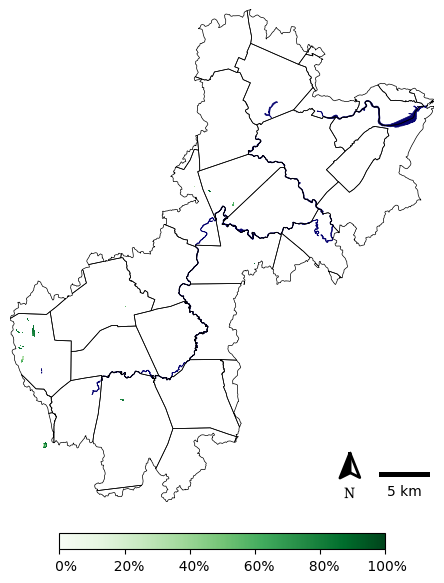

In [222]:
# Map the data for public ownership
f, ax = plt.subplots(figsize=(6,8))

hidden = ax.imshow(TCC2021_pub[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)

show(TCC2021_pub,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones PUBLIC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# map the data for private ownership 
f, ax = plt.subplots(figsize=(6,8))

hidden = ax.imshow(TCC2021_pri[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)

show(TCC2021_pri,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones PRIVATE for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# Map the data for unknown ownership 
f, ax = plt.subplots(figsize=(6,8))

hidden = ax.imshow(TCC2021_unk[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)

show(TCC2021_unk,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones UNKNOWN for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

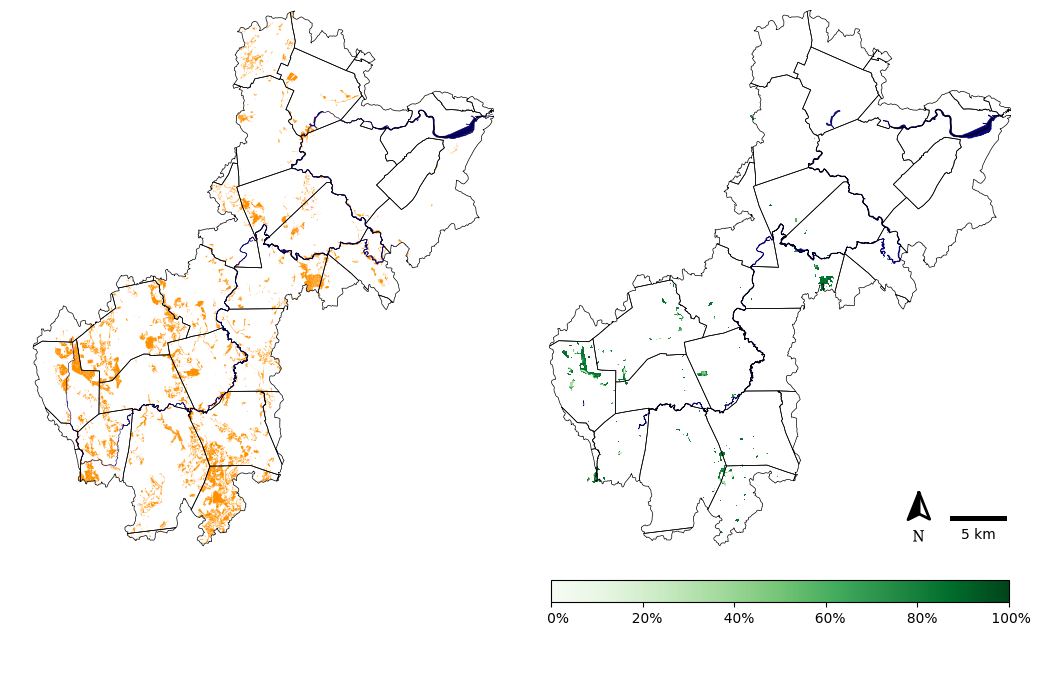

In [597]:
# Show high priority conservation opportunities and tree canopy overall as maps
f, ax = plt.subplots(1,2,figsize=(12,7),layout='tight')

HP_cons_opps.plot(ax=ax[0],color='#ff9101')
towns.boundary.plot(ax=ax[0],color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')
ax[0].set_ylim([852000,911600])

hidden = ax[1].imshow(TCC2021_mask[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)
show(TCC2021_mask,cmap='Greens',ax=ax[1],extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.5)
ax[1].axis('off')
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax[1].add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [93]:
# Zonal stats on conservation opportunities
HP_cons_opps=HP_cons_opps.dissolve()[['geometry']]
HPCons_stats=pd.DataFrame(rasterstats.zonal_stats(HP_cons_opps, "../../Working_Data/TCC"+'2021'+".tif",stats="count min mean max median"),index=HP_cons_opps.index)

# acreage of trees of interest
HPCons_stats['mean']/100*(HP_cons_opps.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    12231.193518
dtype: float64

In [94]:
# Average canopy coverage (%) for the conservation priority zones
HPCons_stats['mean']

<IPython.core.display.HTML object>


0    67.023526
Name: mean, dtype: float64

In [95]:
# Area of priority zones
HP_cons_opps.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    18249.104962
dtype: float64

In [103]:
# Zonal stats for subcategory of ownership
unk_cons_opp=unk_cons_opp[['geometry']]
HPCons_stats=pd.DataFrame(rasterstats.zonal_stats(unk_cons_opp, "../../Working_Data/TCC"+'2021'+".tif",stats="count min mean max median"),index=unk_cons_opp.index)

# Area of trees
HPCons_stats['mean']/100*(unk_cons_opp.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    154.074721
dtype: float64

In [104]:
# average canopy coverage (%) for unknown ownership priority zones
HPCons_stats['mean']

<IPython.core.display.HTML object>


0    59.703672
Name: mean, dtype: float64

In [105]:
# area of unknown zones
unk_cons_opp.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    258.065737
dtype: float64

In [112]:
# Percent of total zones that are specific ownership type
258/(3394+12651+258)*100

<IPython.core.display.HTML object>

1.5825308225479975

# Natural Valley Storage Area

In [85]:
# Load NVSA data
NVSA=gpd.read_file('../../Raw_Data/NVSA/NVSA.shp',driver='pyogrio').to_crs(epsg=26986)

<IPython.core.display.HTML object>

In [346]:
# Zonal stats on NVSA data and tree canopy
NVSA_stats=pd.DataFrame(rasterstats.zonal_stats(NVSA.dissolve(), "../../Working_Data/TCC2021.tif",stats="mean"))

<IPython.core.display.HTML object>

In [348]:
# Area of trees in NVSA
NVSA_stats['mean']/100*NVSA.dissolve().geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    2375.461065
dtype: float64

<IPython.core.display.HTML object>

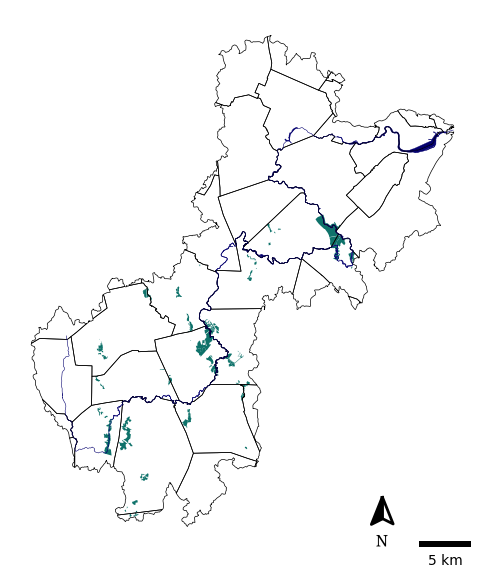

In [87]:
# Map of NVSA
fig,ax=plt.subplots(figsize=(6,8))
NVSA.to_crs(epsg=26986).plot(ax=ax,color='#0e726a',legend=False)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.axis('off')
fig.savefig('Output Maps/NVSA.png',dpi=300,transparent=True,bbox_inches='tight')

# Dams and Tributaries

In [228]:
# Load dam data and only select those that are state or federally regulated
Dams=gpd.read_file('../../Raw_Data/Dams/DAMS_PT.shp',driver='pyogrio').clip(CRW)
Dams=Dams[(Dams.REGAUTH!='Non-Jurisdictional - Other') | (Dams.HAZCODE!='N/A')]

<IPython.core.display.HTML object>

In [229]:
# Select specific dams to highlight
Target_Dams=Dams[(Dams.DAMNAME=='Charles River Dam At South Natick')|(Dams.DAMNAME=='Watertown Dam')|(Dams.DAMNAME=='Eagle Dam')]
Removed_Dams=Dams[Dams.DAMNAME=='Old Mill Dam']

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

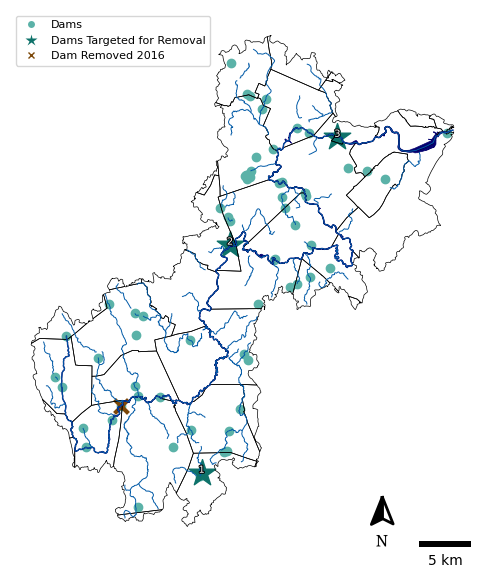

In [230]:
# Produce map
fig,ax=plt.subplots(figsize=(6,8))
Dams.to_crs(epsg=26986).plot(ax=ax,color='#5bb2a8',legend=False)
Target_Dams.to_crs(epsg=26986).plot(ax=ax,color='#0e726a',marker='*',markersize=400,legend=False)
Removed_Dams.to_crs(epsg=26986).plot(ax=ax,color='#7c4809',marker='x',markersize=100,linewidth=3,legend=False)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=1)
Tribs.to_crs(epsg=26986).plot(ax=ax,color='#015AA7',linewidth=0.7)
ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)

Target_Dams['coords'] = Target_Dams['geometry'].apply(lambda x: x.centroid.coords[:])
Target_Dams['coords'] = [coords[0] for coords in Target_Dams['coords']]
j=1
for idx, row in Target_Dams.iterrows():
    ax.annotate(text=str(j), xy=row['coords'],
                horizontalalignment='center',fontsize=7,color='white',
                path_effects=[mpl.patheffects.withStroke(linewidth=1.5, foreground="black")])
    j+=1

l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5bb2a8', marker='o',markeredgecolor=(1,1,1,0),markersize=5, label='Dams')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0e726a', marker='*',markeredgecolor=(1,1,1,0),markersize=9, label='Dams Targeted for Removal')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#7c4809', marker='x',markeredgecolor='#7c4809',markersize=5, label='Dam Removed 2016')
ax.legend(handles=[l1,l2,l3],loc='upper left',fontsize=8)

ax.axis('off')
fig.savefig('Output Maps/Dams.png',dpi=300,transparent=True,bbox_inches='tight')

# Intermittent Streams

In [185]:
# Identify intermittent streams
iStreams=rivers_arc[rivers_arc.ARC_CODE==5]

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

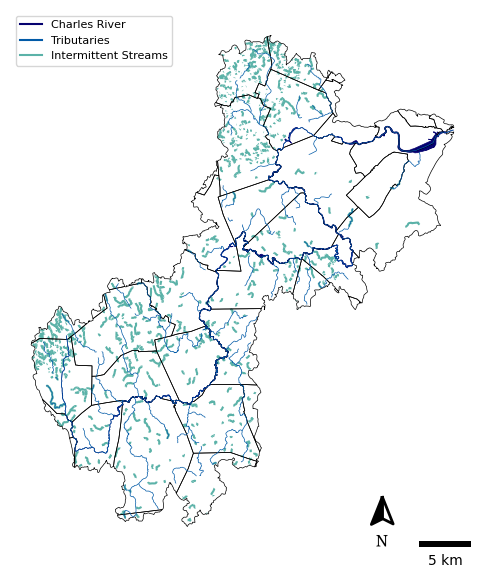

In [187]:
# Map intermittent streams
fig,ax=plt.subplots(figsize=(6,8))
iStreams.plot(ax=ax,color='#5bb2a8')
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=.5)
Tribs.to_crs(epsg=26986).plot(ax=ax,color='#015AA7',linewidth=0.5)
ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.axis('off')

l1 = mpl.lines.Line2D([], [], color='#060270', label='Charles River')
l2 = mpl.lines.Line2D([], [], color='#015AA7', label='Tributaries')
l3 = mpl.lines.Line2D([], [], color='#5bb2a8', label='Intermittent Streams')
ax.legend(handles=[l1,l2,l3],loc='upper left',fontsize=8)

fig.savefig('Output Maps/Intermittent Streams.png',dpi=300,transparent=True,bbox_inches='tight')

# Overall Protection Map

In [318]:
# Tree Canopy under ordinances
Pub_Ords=Ords[(Ords['Tree Ordinance']=='Yes')&(Ords['Private']!='Y')]
Pub_Protect=Parcels_wPublic[Parcels_wPublic.Public=='U'].clip(Pub_Ords).dissolve()
Pub_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),Pub_Protect.to_crs(epsg=26986).geometry,crop=True,filled=False)

Pri_Ords=Ords[(Ords['Tree Ordinance']=='Yes')&(Ords['Private']=='Y')]
Pri_Protect=Parcels_wPublic.clip(Pri_Ords).dissolve()
Pri_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),Pri_Protect.to_crs(epsg=26986).geometry,crop=True,filled=False)

<IPython.core.display.HTML object>

In [319]:
# Extent for mapping
Pri_extent=[Pri_Protect.dissolve().geometry.bounds['minx'][0],Pri_Protect.dissolve().geometry.bounds['maxx'][0],Pri_Protect.dissolve().geometry.bounds['miny'][0],Pri_Protect.dissolve().geometry.bounds['maxy'][0]]
Pub_extent=[Pub_Protect.dissolve().geometry.bounds['minx'][0],Pub_Protect.dissolve().geometry.bounds['maxx'][0],Pub_Protect.dissolve().geometry.bounds['miny'][0],Pub_Protect.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [320]:
# Tree canopy on protected open space
P_OS=OS[OS['LEV_PROT']=='P']
POS_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),P_OS.to_crs(epsg=26986).geometry,crop=True,filled=False)
OS_extent=[P_OS.dissolve().geometry.bounds['minx'][0],P_OS.dissolve().geometry.bounds['maxx'][0],P_OS.dissolve().geometry.bounds['miny'][0],P_OS.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [321]:
# Tree Canopy on NVSA land
NVSA_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),NVSA[NVSA.geometry!=None].to_crs(epsg=26986).geometry,crop=True,filled=False)
NVSA_extent=[NVSA.dissolve().geometry.bounds['minx'][0],NVSA.dissolve().geometry.bounds['maxx'][0],NVSA.dissolve().geometry.bounds['miny'][0],NVSA.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

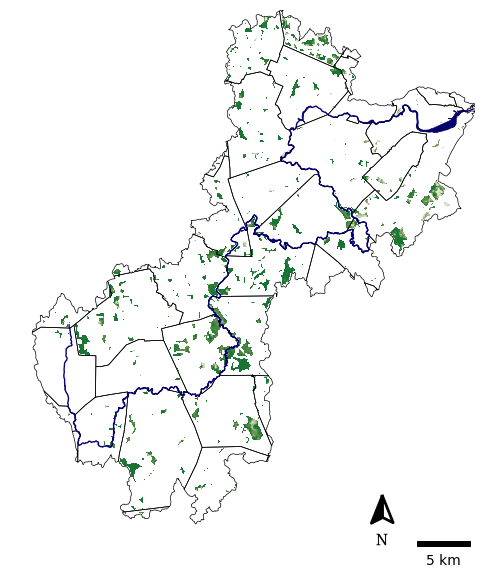

In [328]:
# Final protection map
fig,ax=plt.subplots(figsize=(6,8))
show(Pri_TCC,ax=ax,cmap=my_greens,extent=Pri_extent)
show(Pub_TCC,ax=ax,cmap=my_greens,extent=Pub_extent)
show(NVSA_TCC,ax=ax,cmap=my_greens,extent=NVSA_extent)
show(POS_TCC,ax=ax,cmap=my_greens,extent=OS_extent)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=1)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/Protected Trees.png',dpi=300,transparent=True,bbox_inches='tight')

In [323]:
# Combine into one layer
Protect_All=Pub_Protect[['geometry']].overlay(Pri_Protect[['geometry']],how='union').overlay(NVSA[NVSA.geometry!=None][['geometry']].dissolve(),how='union').overlay(P_OS[['geometry']].dissolve(),how='union').dissolve()

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:2467: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:2467: UserWarning: `keep_geom_type=True` in overlay resulted in 939 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [324]:
# Zonal statistics
P_stats=pd.DataFrame(rasterstats.zonal_stats(Protect_All, "../../Working_Data/TCC2021.tif",stats="mean"))
P_stats['mean']/100*Protect_All.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    28473.496892
dtype: float64

In [325]:
CRW_stats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC2021.tif",stats="mean"))
CRW_stats['mean']/100*CRW.dissolve().geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    106815.581787
dtype: float64

In [326]:
# Final amount of acres of trees that are protected 
(P_stats['mean']/100*Protect_All.geometry.area*2.47105381/10000)/(CRW_stats['mean']/100*CRW.dissolve().geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    0.266567
dtype: float64